Machine Learning Project 
Real estate valuation model using Keras and TensorFlow 
Dataset used to train model: https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [8]:

#More information about data processing in markdown below this section



import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
import matplotlib.pyplot as plt



#import data
dataset = pd.read_csv('housing.csv')

#values = dataset['ocean_proximity'].value_counts()

#print(values)



#Changing last column from string to appropriate float. The closer the property was to the ocean the higher we chose for the value
dataset['ocean_proximity'].replace({'<1H OCEAN': 2, 'INLAND': 1, 'NEAR BAY': 3, 'NEAR OCEAN': 4, 'ISLAND': 5}, inplace=True)

#checking the values of Ocean Proxmity
values = dataset['ocean_proximity'].value_counts()


print(dataset.head(10))


#this removes any invalid values from the dataset
dataset = dataset.dropna()


sum = dataset.isna().sum()
print(sum)
np.set_printoptions (formatter = {'float': '{:0.2f}'.format})


#splitting into training and testing data. 80% is training data
#https://blog.jcharistech.com/2020/09/23/how-to-split-dataset-into-training-and-testing-dataset-for-machine-learning/

X = dataset.iloc[:,:-2].values
Y = dataset['median_house_value'].values
split_ratio = 0.8
split_index = int(split_ratio*len(X))


X_train, X_test = np.split(X, [split_index])
Y_train, Y_test = np.split(Y, [split_index])



print(X_train.shape)
#adding in the last column 'ocean proximity' to our X training/testing data
last_col_train = dataset.iloc[:split_index, -1].values
X_train = np.concatenate((X_train, last_col_train.reshape((-1, 1))), axis=1)

last_col_test = dataset.iloc[split_index:, -1].values
X_test = np.concatenate((X_test, last_col_test.reshape((-1, 1))), axis=1)

#checking data
print(X_train.shape)
print(X_train[:10])
print(X_test.shape)
print(X_test[:10])

print(Y_train.shape)
print(Y_train[:10])

print(Y_test.shape)
print(Y_test[:10])





   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                3  
1      2401.0 

In [ ]:
How we analyzed our data
Found the dataset from: https://www.kaggle.com/datasets/camnugent/california-housing-prices

It's a housing prices dataset. The most trouble was given by the last column that was a column with string values 
describing how close the property was to the ocean.
We chose to convert them to integers ranging from 1-5. The closer the value was to 1 the further inland the 
property was.
Then used dropna() to drop any rows that contained invalid values from the dataset


### 2.2 - Build your model

Start with a basic model, show the results, and then apply whichever improvements you decide to incorporate as per below.

You have two options for building your model:
- **The difficult option**: Use the provided L-layer network code used above in Part 1 and (later) extend it to incorporate more advanced neural network improvements as given in class
- **The easier option**: Use [Keras](https://keras.io) and [TensorFlow](https://www.tensorflow.org) to build a network
	- You may *not* use any framework other than Keras/TensorFlow

Ambition will be rewarded! If you choose the easier option, you are expected to incorporate more of the potential improvements given below.

Some of the neural network improvements you can consider incorporating for either option (not an exhaustive list):
- Weight initialization methods (e.g., zeroes, random, etc.)
- Regularization: L2, dropout, etc.
- Mini-batch gradient descent
- Gradient descent optimization algorithm: momentum, RMSProp, Adam, etc.
- Batch normalization

Show the results with your model with improvements. Use markdown boxes to discuss the effect of your improvement(s) and change in accuracy.

Epoch 1/50
256/256 [==============================] - 3s 9ms/step - loss: 40915673088.0000 - val_loss: 30011328512.0000
Epoch 2/50
256/256 [==============================] - 2s 6ms/step - loss: 25784190976.0000 - val_loss: 28726910976.0000
Epoch 3/50
256/256 [==============================] - 2s 6ms/step - loss: 24733657088.0000 - val_loss: 26877278208.0000
Epoch 4/50
256/256 [==============================] - 2s 7ms/step - loss: 23310841856.0000 - val_loss: 25427781632.0000
Epoch 5/50
256/256 [==============================] - 2s 8ms/step - loss: 21366495232.0000 - val_loss: 23311882240.0000
Epoch 6/50
256/256 [==============================] - 2s 8ms/step - loss: 18829977600.0000 - val_loss: 19854039040.0000
Epoch 7/50
256/256 [==============================] - 2s 6ms/step - loss: 15738828800.0000 - val_loss: 16730001408.0000
Epoch 8/50
256/256 [==============================] - 2s 6ms/step - loss: 12976892928.0000 - val_loss: 14280273920.0000
Epoch 9/50
256/256 [====================

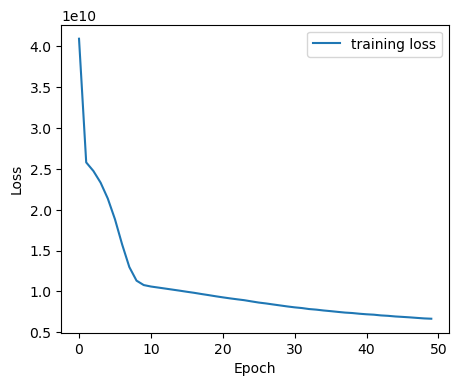

128/128 [==============================] - 0s 3ms/step - loss: 7413422080.0000
Test loss: 7413422080.0
128/128 [==============================] - 1s 3ms/step
Average difference between predicted and actual housing prices: $111,525.96


ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 4087.

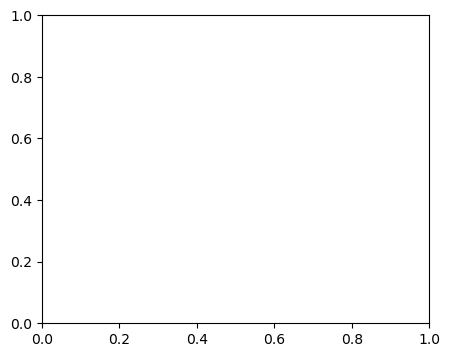

In [9]:
# Your work for building a basic model and then applying improvements
#help for building a model https://www.h2kinfosys.com/blog/linear-regression-with-keras-on-tensorflow/



#basic model for predicting housing prices 

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
#using mean_squared_error is commonly used loss function. Calculates mean squared difference between loss and actual values
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on training data
#mini-batch size if 64
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss = model.evaluate(X_test, Y_test)
print('Test loss:', test_loss)

# Use the trained model to predict on test data
Y_pred = model.predict(X_test)

# Calculate the mean absolute error between predicted and actual values
mae = np.mean(np.abs(Y_pred - Y_test))

# Print the average difference
print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mae))

import matplotlib.pyplot as plt

# Plot actual versus predicted values on test data
# Plot the actual and predicted values
plt.scatter(Y_test, Y_pred, c=['blue', 'orange'])
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()







### 2.3 - Idea, Code, Experiment Cycle

Now go through a iterative process to improve your model. This will involve things like (not an exhaustive list):
- Checking whether you have a bias and/or variance problem. How will you address it? 
- Hyperparameter tuning: learning rate, # of layers, # of hidden units, activation functions, mini-batch size, etc.
- Trying any of the improvements made to the model in part 2.2 to see if it leads to better results

We want to see the progression of your model to a final version with the best results you can achieve. You don't have to show results for every single experiment you tried, but a general progression of different models at various stages of development should be included. Feel free to include discussion, diagrams, tables, and/or graphs that may summarize some of your experiments. **If you only show us the final model you've built, your mark will be minimal**.

Your discussion should also include details on the methodology you used in your experiments. For example, how did you approach hyperparameter tuning?


Epoch 1/50
256/256 [==============================] - 1s 2ms/step - loss: 31893344256.0000 - val_loss: 27782412288.0000
Epoch 2/50
256/256 [==============================] - 0s 1ms/step - loss: 20786812928.0000 - val_loss: 18544773120.0000
Epoch 3/50
256/256 [==============================] - 0s 1ms/step - loss: 12225386496.0000 - val_loss: 13205585920.0000
Epoch 4/50
256/256 [==============================] - 0s 1ms/step - loss: 10532543488.0000 - val_loss: 13087376384.0000
Epoch 5/50
256/256 [==============================] - 0s 1ms/step - loss: 10197989376.0000 - val_loss: 11850206208.0000
Epoch 6/50
256/256 [==============================] - 0s 1ms/step - loss: 9867958272.0000 - val_loss: 11120222208.0000
Epoch 7/50
256/256 [==============================] - 0s 1ms/step - loss: 9428332544.0000 - val_loss: 10937426944.0000
Epoch 8/50
256/256 [==============================] - 0s 1ms/step - loss: 9002705920.0000 - val_loss: 10639595520.0000
Epoch 9/50
256/256 [=======================

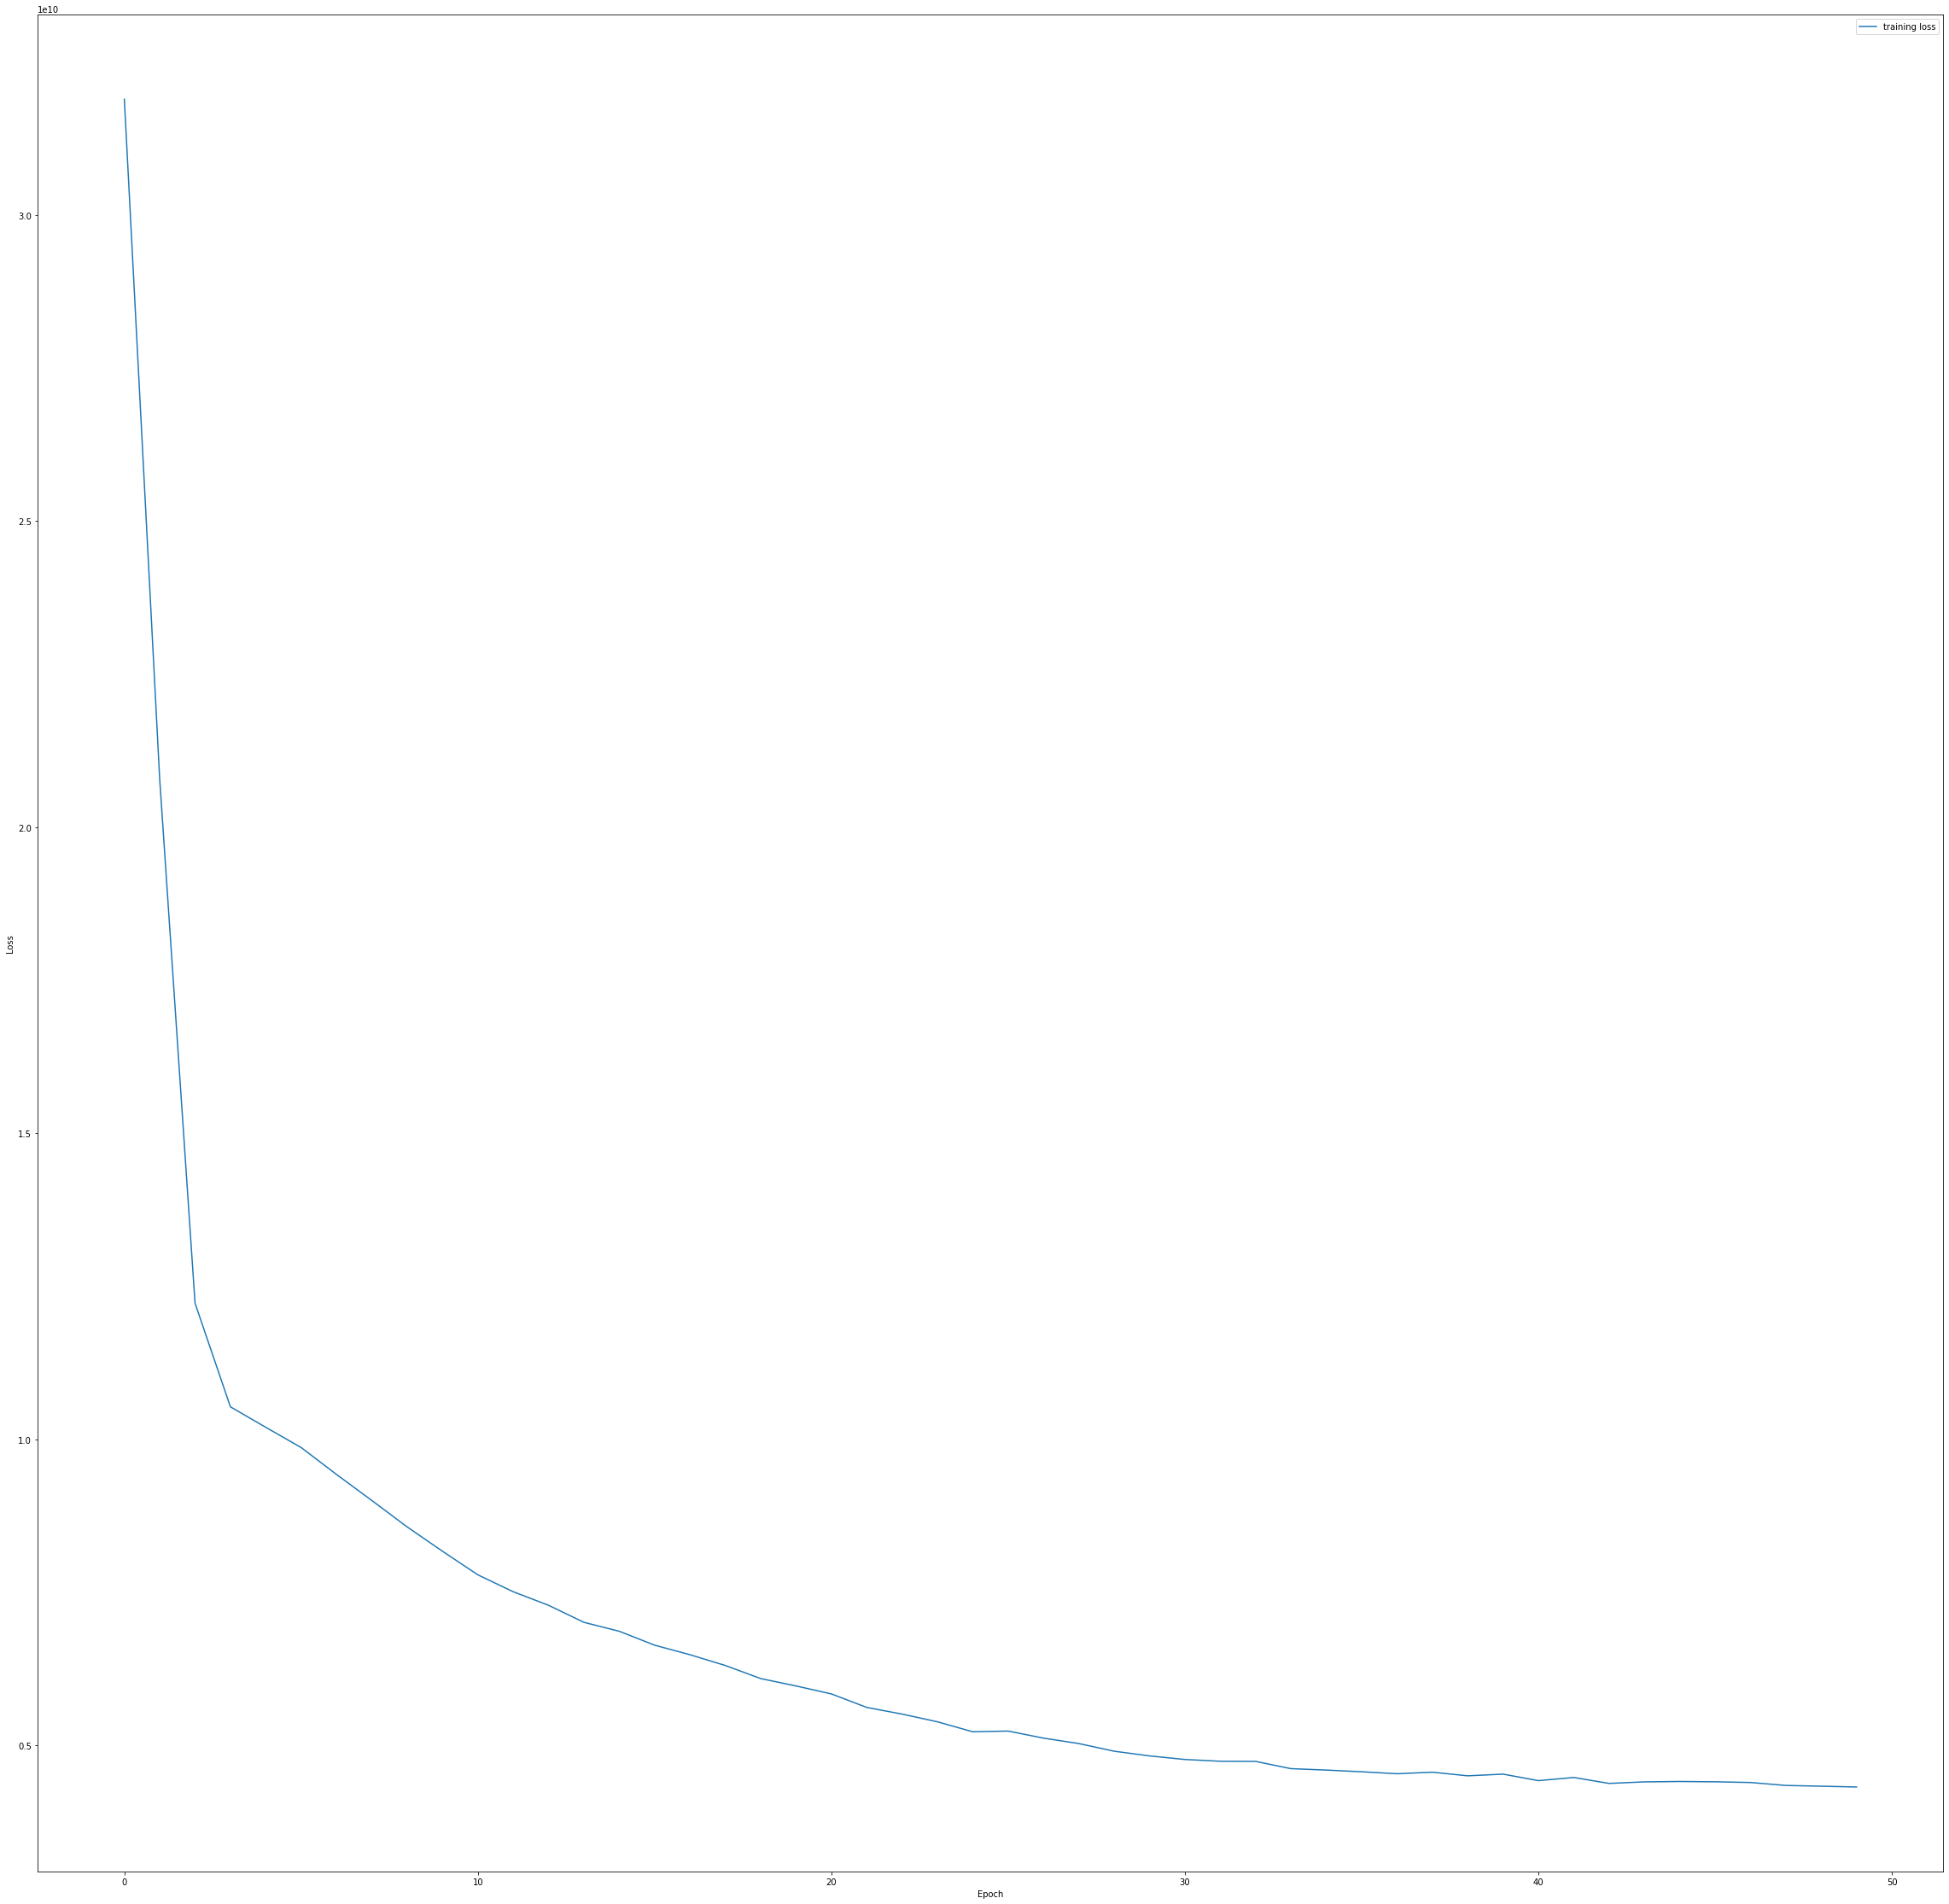

128/128 [==============================] - 0s 735us/step - loss: 4275500032.0000
Test loss: 4275500032.0
128/128 [==============================] - 0s 627us/step
Average difference between predicted and actual housing prices: $124,354.72


In [93]:
# Adding more layers

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
#plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test data
loss_test = model.evaluate(X_test, Y_test)
print('Test loss:', loss_test)

# predict on test data
y_predication = model.predict(X_test)

# mean absolute error
mean = np.mean(np.abs(y_predication - Y_test))


print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mean))

We noticed we had a problem but were unsure if it was a variance problem or a bias problem. What we first did was tune the number of layers hyperparameter by adding more dense layers into our models. What we saw was that the average differnce between predicted and actual houseing price went up from the starting point in section 2.2 to what its at now. This increase of number of layers negatively impacted our average difference so we knew that our data had high variance instead of high bias as adding layers is supposed to lower bias. 

Epoch 1/50
256/256 [==============================] - 1s 2ms/step - loss: 35303833600.0000 - val_loss: 27806070784.0000
Epoch 2/50
256/256 [==============================] - 0s 1ms/step - loss: 24287393792.0000 - val_loss: 25369567232.0000
Epoch 3/50
256/256 [==============================] - 0s 1ms/step - loss: 20317169664.0000 - val_loss: 20815448064.0000
Epoch 4/50
256/256 [==============================] - 0s 1ms/step - loss: 14689157120.0000 - val_loss: 14728508416.0000
Epoch 5/50
256/256 [==============================] - 0s 1ms/step - loss: 11351168000.0000 - val_loss: 12914473984.0000
Epoch 6/50
256/256 [==============================] - 0s 1ms/step - loss: 10674817024.0000 - val_loss: 12874784768.0000
Epoch 7/50
256/256 [==============================] - 0s 1ms/step - loss: 10482608128.0000 - val_loss: 12005282816.0000
Epoch 8/50
256/256 [==============================] - 0s 1ms/step - loss: 10239305728.0000 - val_loss: 11850557440.0000
Epoch 9/50
256/256 [====================

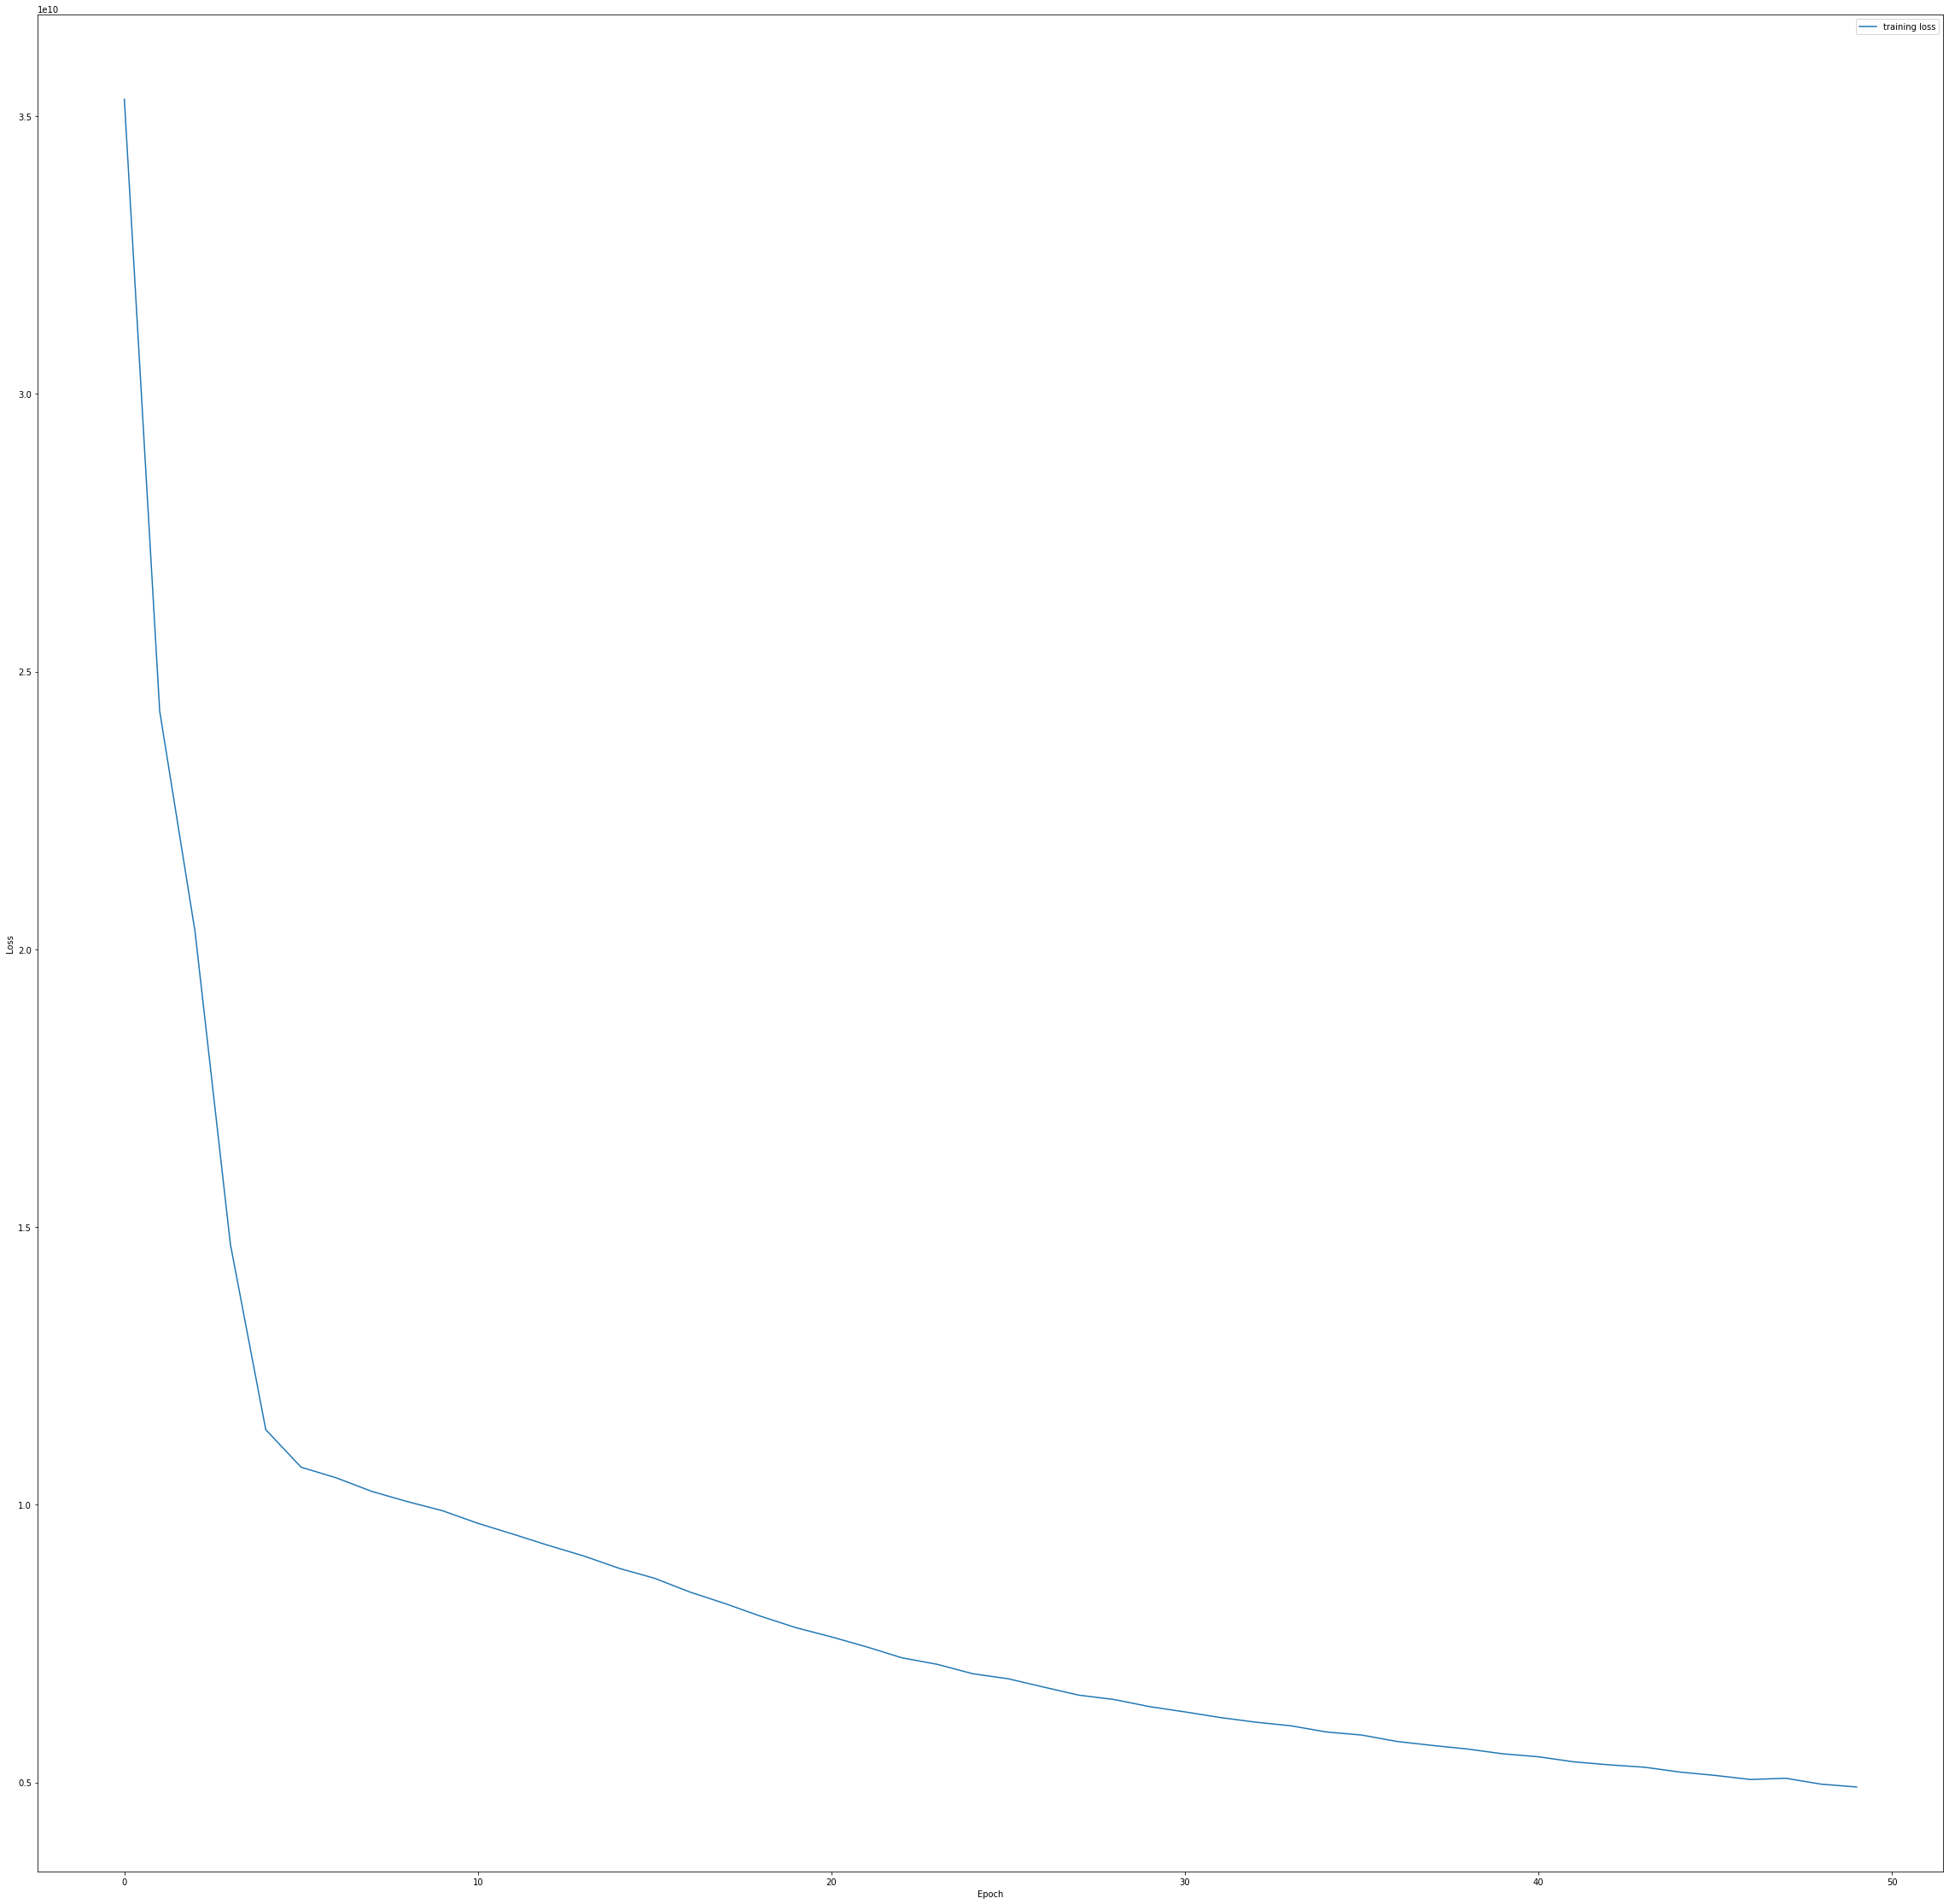

128/128 [==============================] - 0s 722us/step - loss: 5796195840.0000
Test loss: 5796195840.0
128/128 [==============================] - 0s 615us/step
Average difference between predicted and actual housing prices: $118,843.58


In [94]:
# Change number of hidden units
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))


# Plot the loss
plt.plot(history.history['loss'], label='training loss')
#plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test data
loss_test = model.evaluate(X_test, Y_test)
print('Test loss:', loss_test)

# predict on test data
y_predication = model.predict(X_test)

# mean absolute error
mean = np.mean(np.abs(y_predication - Y_test))


print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mean))

Next we increased the number of hidden units in our 2 hidden layers. We thought that doing this will help bring the average differernce between predicted and actual housing prices lower then what we started off with in Section 2.2. Adding more hidden units brought our average difference lower from our last idea but was still negatively impacted. 

Epoch 1/50
256/256 [==============================] - 1s 2ms/step - loss: 14709468160.0000 - val_loss: 10453920768.0000
Epoch 2/50
256/256 [==============================] - 0s 1ms/step - loss: 8430417920.0000 - val_loss: 8693185536.0000
Epoch 3/50
256/256 [==============================] - 0s 1ms/step - loss: 7325633536.0000 - val_loss: 6808048640.0000
Epoch 4/50
256/256 [==============================] - 0s 1ms/step - loss: 6604077568.0000 - val_loss: 5954230272.0000
Epoch 5/50
256/256 [==============================] - 0s 1ms/step - loss: 6450557440.0000 - val_loss: 12034543616.0000
Epoch 6/50
256/256 [==============================] - 0s 1ms/step - loss: 6472798720.0000 - val_loss: 7260800512.0000
Epoch 7/50
256/256 [==============================] - 0s 1ms/step - loss: 5862760960.0000 - val_loss: 5206312960.0000
Epoch 8/50
256/256 [==============================] - 0s 1ms/step - loss: 5756458496.0000 - val_loss: 6794248704.0000
Epoch 9/50
256/256 [==============================] -

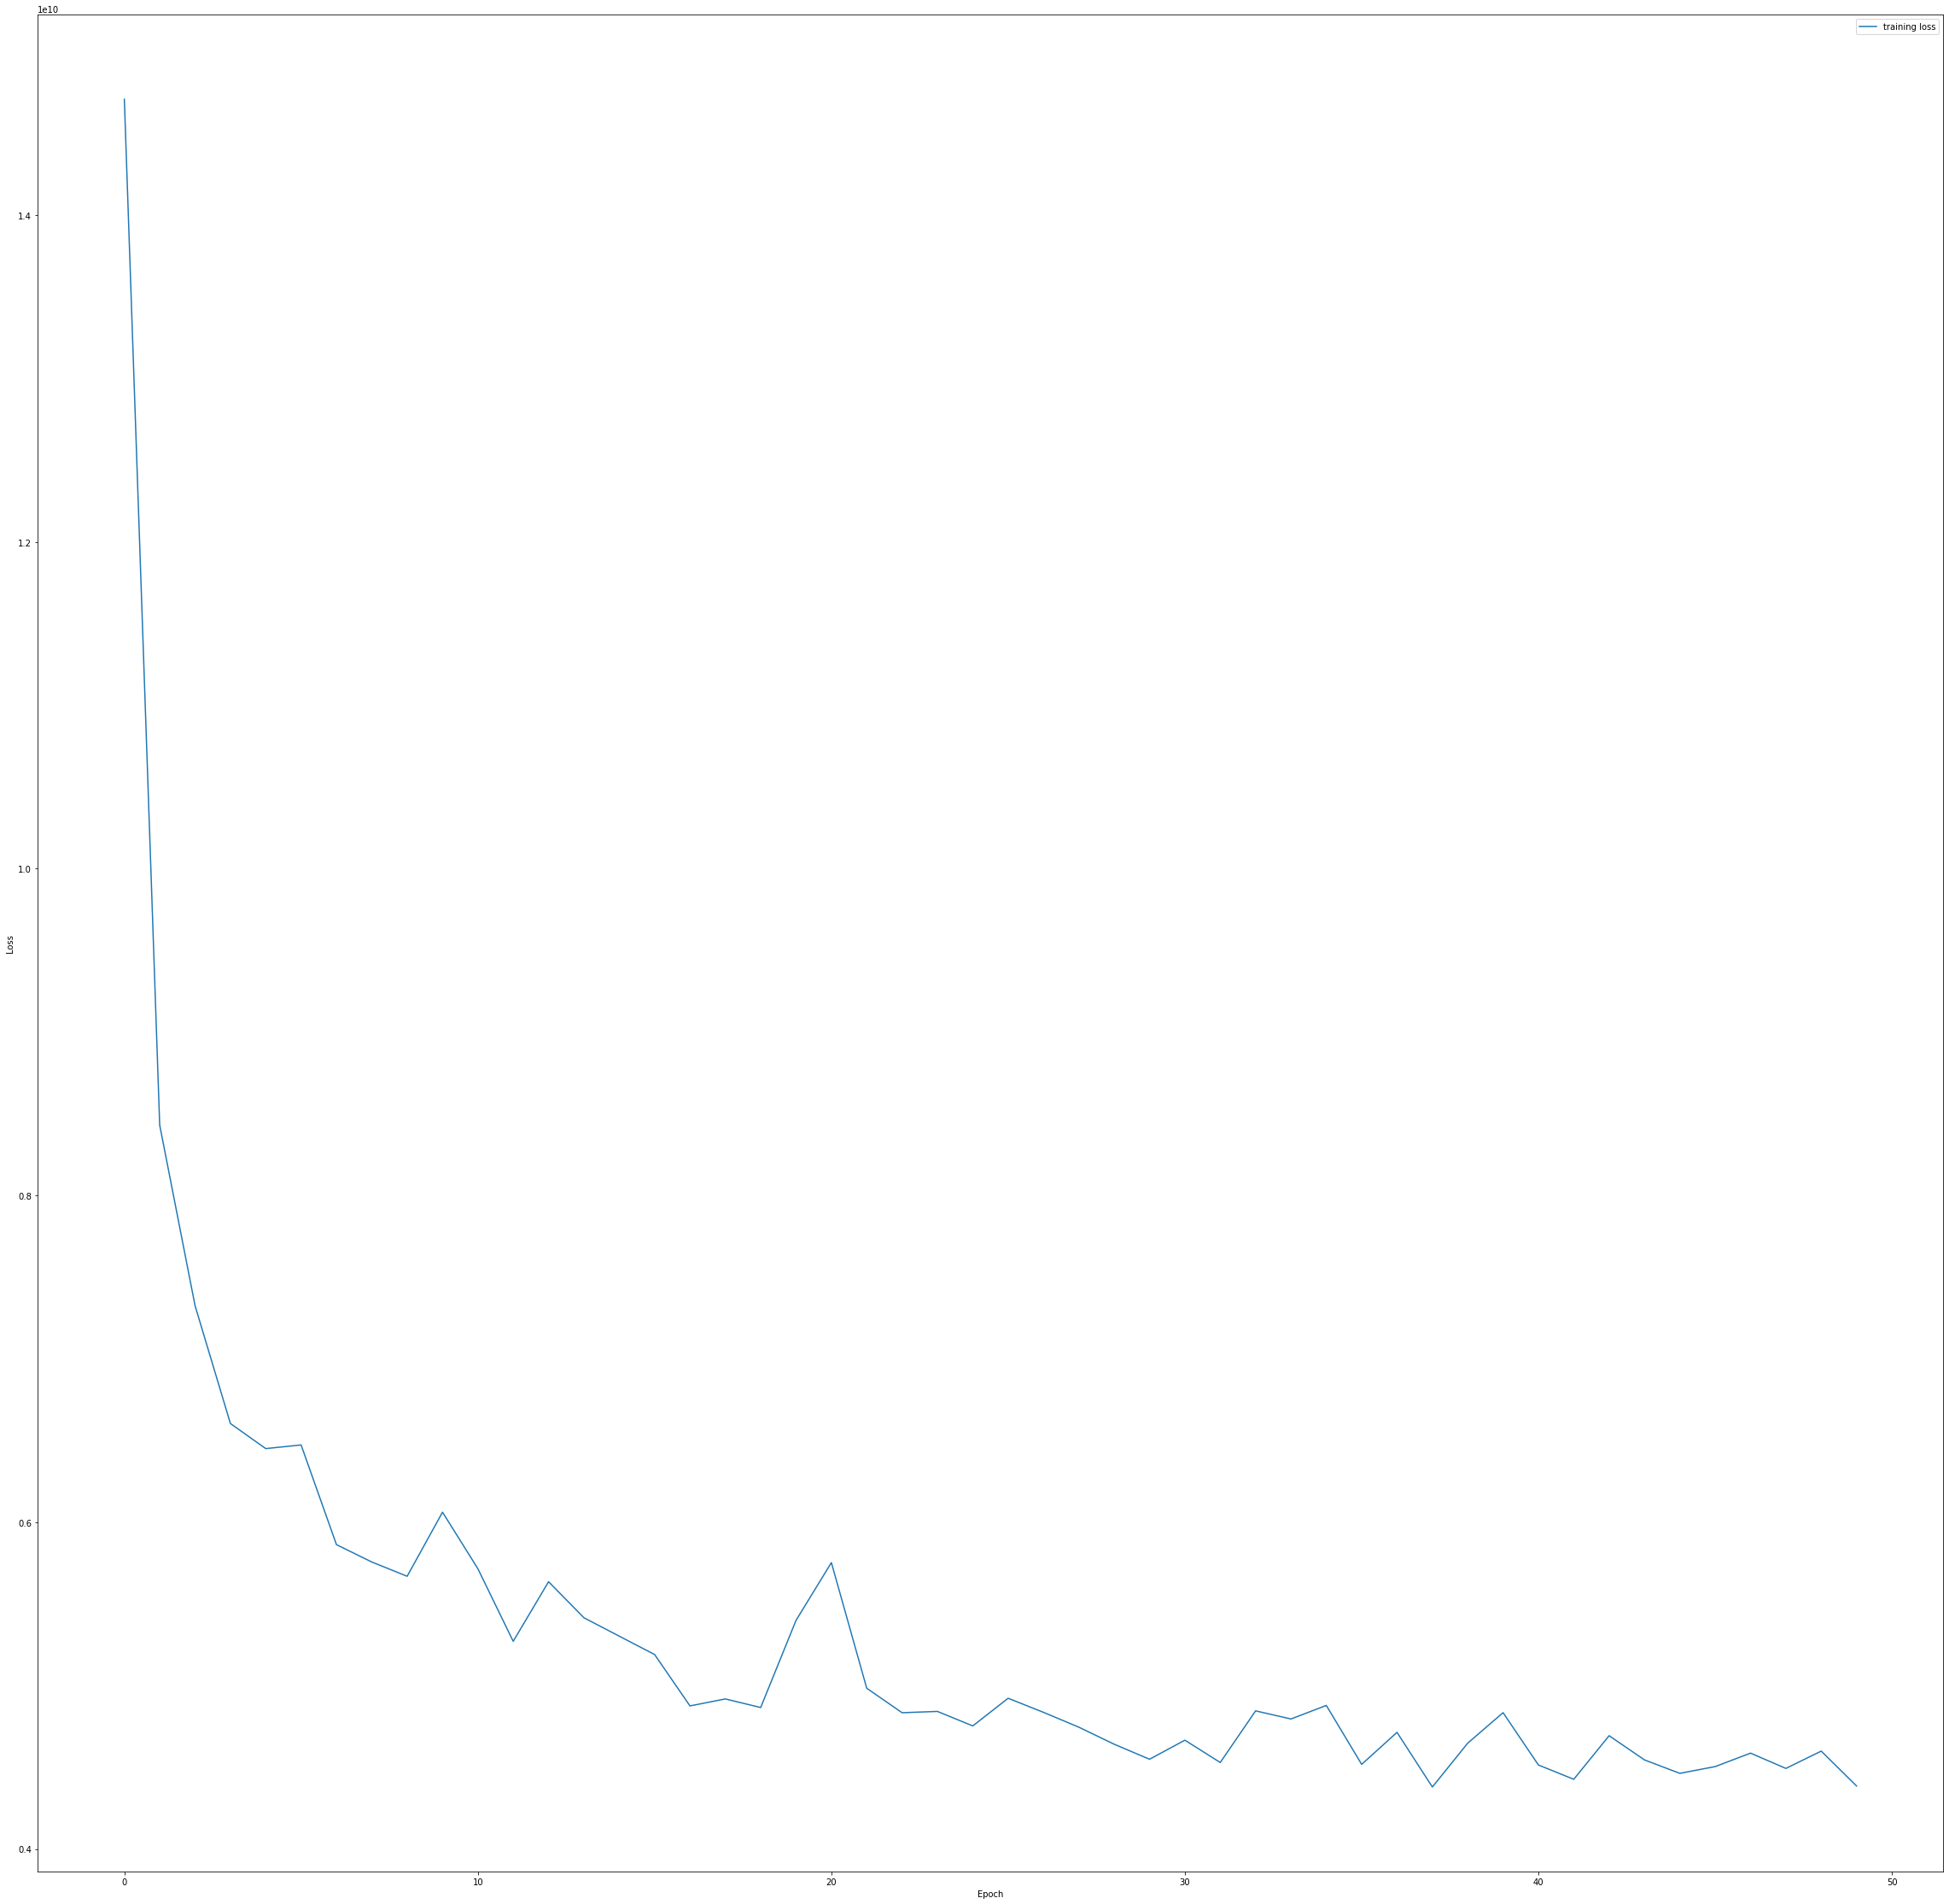

128/128 [==============================] - 0s 733us/step - loss: 6362827264.0000
Test loss: 6362827264.0
128/128 [==============================] - 0s 619us/step
Average difference between predicted and actual housing prices: $125,710.42


In [95]:
# Your work for experiments


# Changed model by using a learning rate of 0.1
# Got code for learning rate: https://keras.io/api/optimizers/

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
#using mean_squared_error is commonly used loss function. Calculates mean squared difference between loss and actual values
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

# Fit the model on training data
#mini-batch size if 64
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test data
loss_test = model.evaluate(X_test, Y_test)
print('Test loss:', loss_test)

# predict on test data
y_predication = model.predict(X_test)

# mean absolute error
mean = np.mean(np.abs(y_predication - Y_test))


print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mean))

Epoch 1/50
256/256 [==============================] - 1s 1ms/step - loss: 24258275328.0000 - val_loss: 14115094528.0000
Epoch 2/50
256/256 [==============================] - 0s 1ms/step - loss: 10776186880.0000 - val_loss: 11803846656.0000
Epoch 3/50
256/256 [==============================] - 0s 1ms/step - loss: 9932493824.0000 - val_loss: 12412236800.0000
Epoch 4/50
256/256 [==============================] - 0s 1ms/step - loss: 9177641984.0000 - val_loss: 11105947648.0000
Epoch 5/50
256/256 [==============================] - 0s 1ms/step - loss: 8492611072.0000 - val_loss: 9354530816.0000
Epoch 6/50
256/256 [==============================] - 0s 1ms/step - loss: 7832766464.0000 - val_loss: 8627383296.0000
Epoch 7/50
256/256 [==============================] - 0s 1ms/step - loss: 7299060736.0000 - val_loss: 8060125696.0000
Epoch 8/50
256/256 [==============================] - 0s 1ms/step - loss: 6916776960.0000 - val_loss: 8093360640.0000
Epoch 9/50
256/256 [==============================

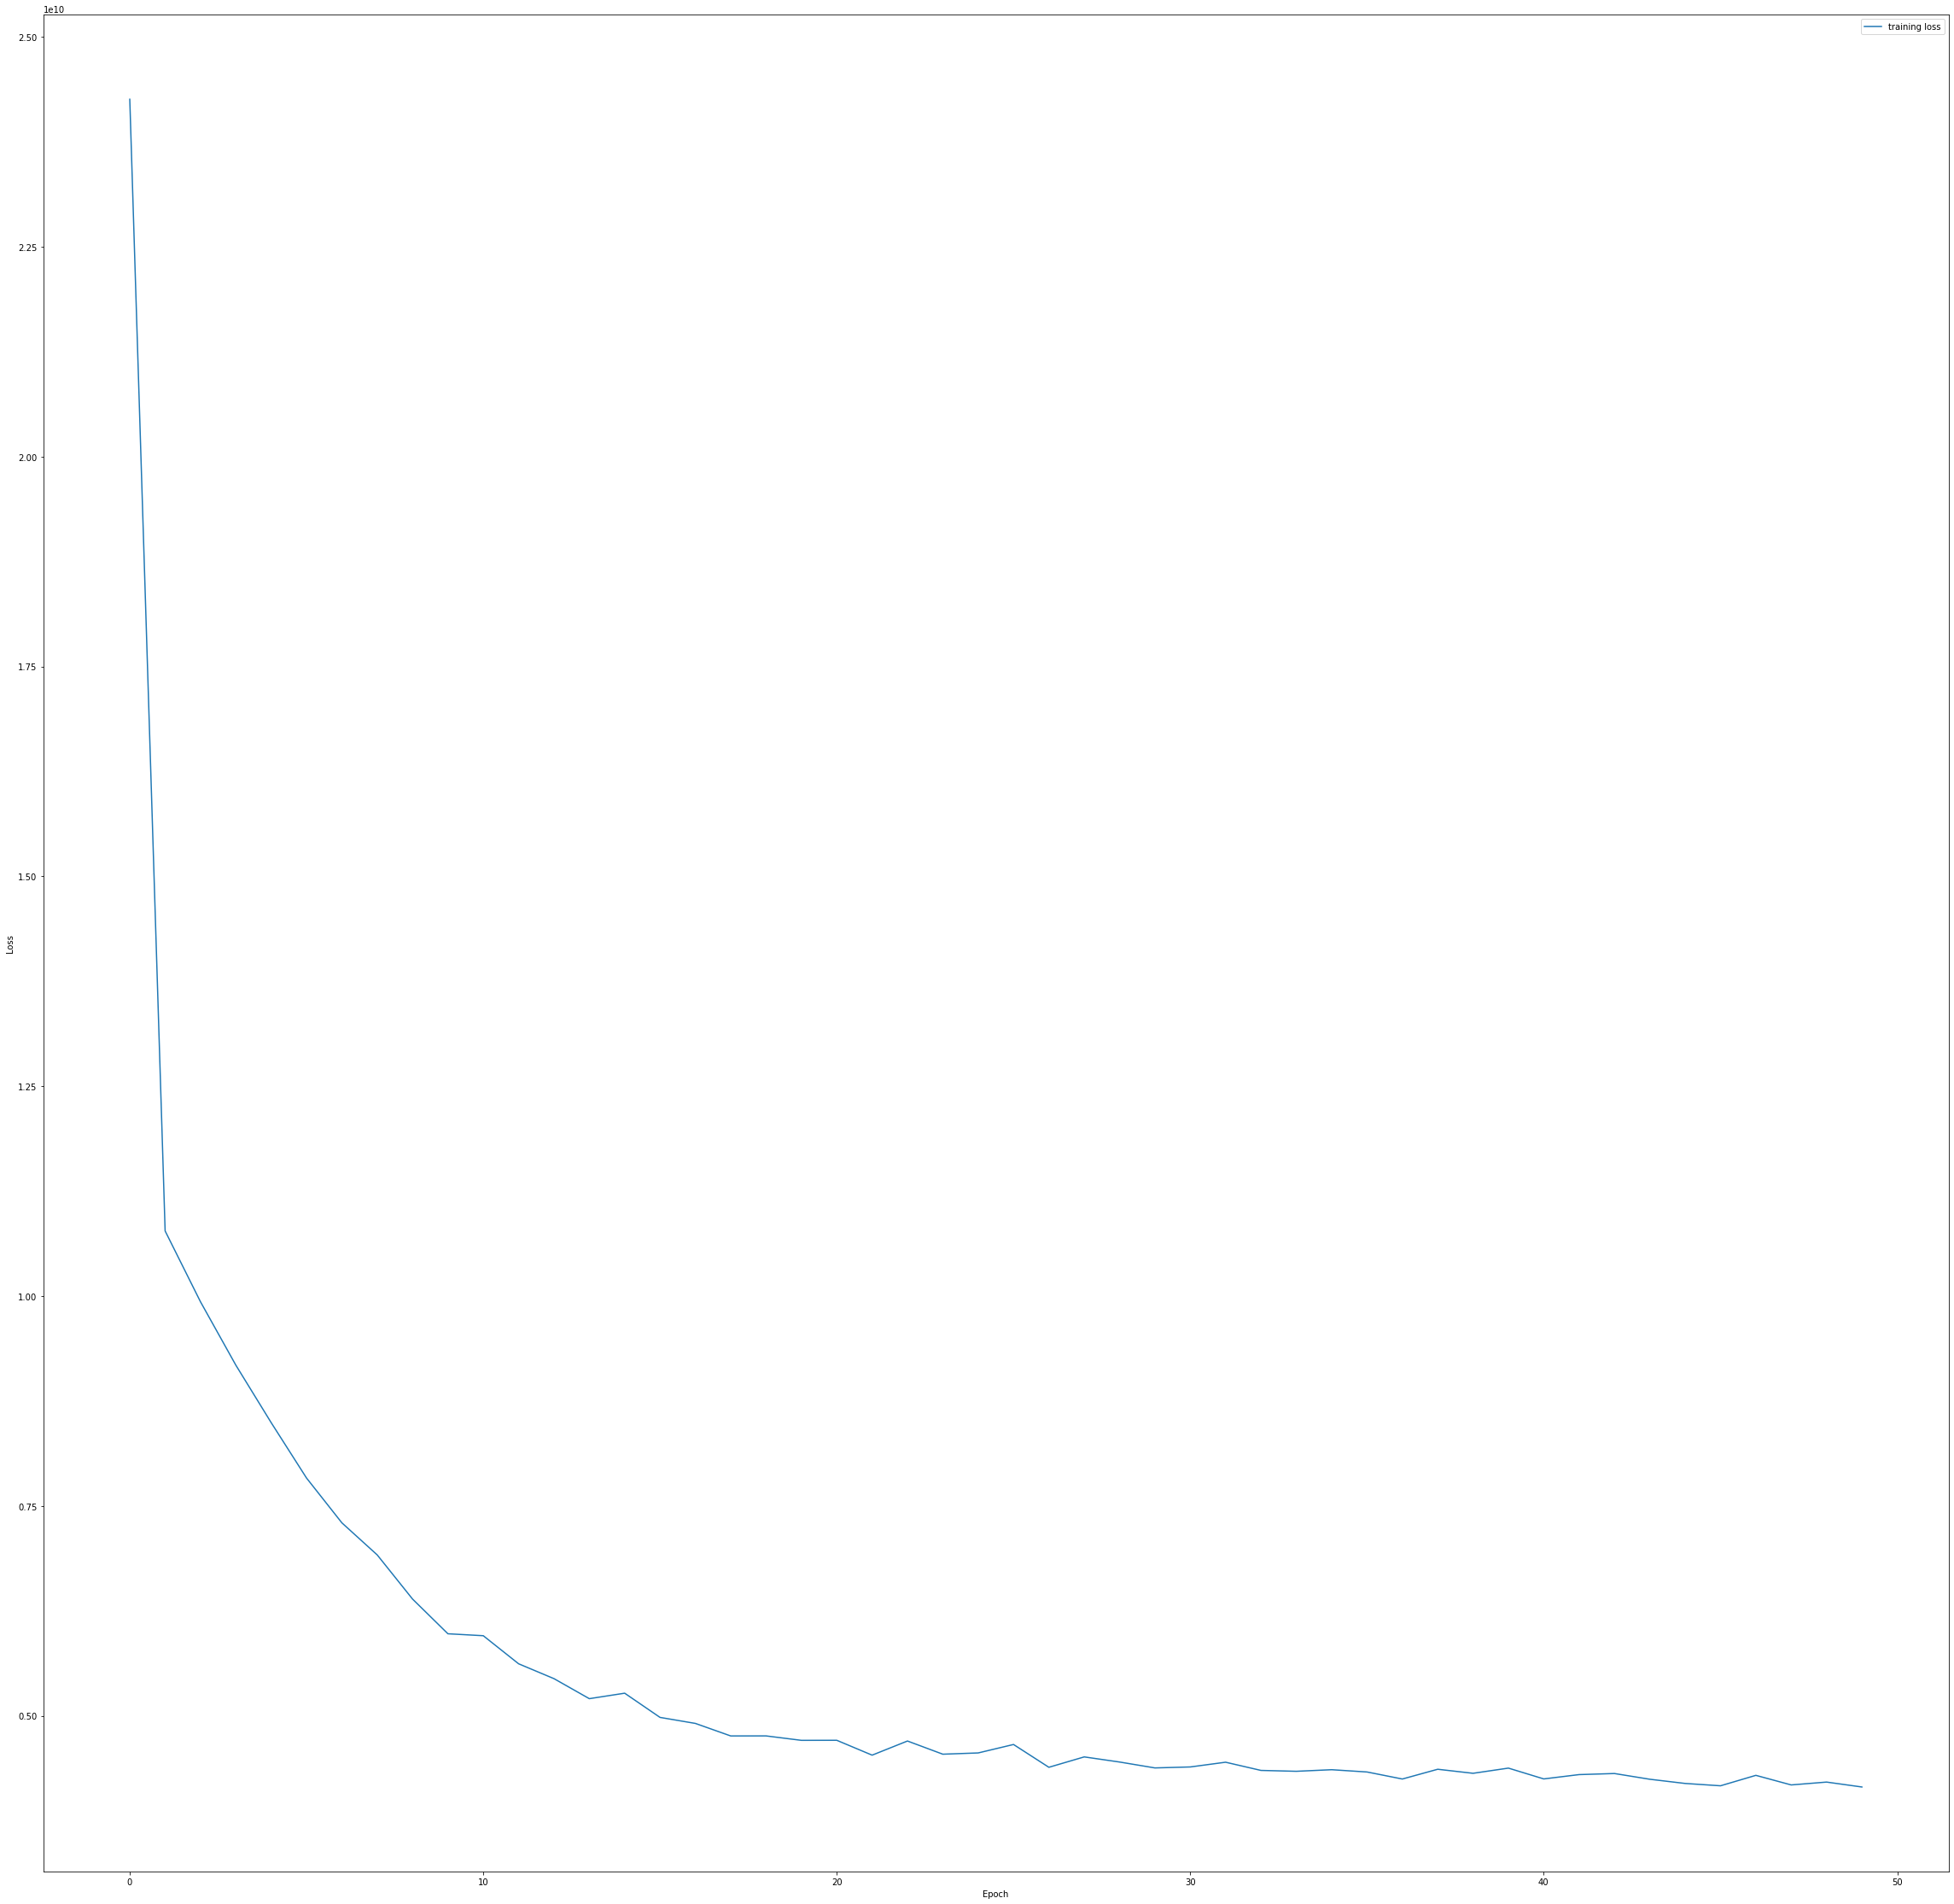

128/128 [==============================] - 0s 764us/step - loss: 5221361152.0000
Test loss: 5221361152.0
128/128 [==============================] - 0s 623us/step
Average difference between predicted and actual housing prices: $122,151.63


In [96]:
# Your work for experiments

# Got code of learning rate: https://keras.io/api/optimizers/
# changed model by using a learning rate of 0.01

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
#using mean_squared_error is commonly used loss function. Calculates mean squared difference between loss and actual values
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Fit the model on training data
#mini-batch size if 64
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test data
loss_test = model.evaluate(X_test, Y_test)
print('Test loss:', loss_test)

# predict on test data
y_predication = model.predict(X_test)

# mean absolute error
mean = np.mean(np.abs(y_predication - Y_test))


print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mean))

Epoch 1/50
256/256 [==============================] - 1s 1ms/step - loss: 39490457600.0000 - val_loss: 29388746752.0000
Epoch 2/50
256/256 [==============================] - 0s 1ms/step - loss: 25674332160.0000 - val_loss: 28155441152.0000
Epoch 3/50
256/256 [==============================] - 0s 1ms/step - loss: 24446910464.0000 - val_loss: 26817789952.0000
Epoch 4/50
256/256 [==============================] - 0s 1ms/step - loss: 22693142528.0000 - val_loss: 24801568768.0000
Epoch 5/50
256/256 [==============================] - 0s 1ms/step - loss: 20183277568.0000 - val_loss: 22679177216.0000
Epoch 6/50
256/256 [==============================] - 0s 1ms/step - loss: 17058819072.0000 - val_loss: 17981284352.0000
Epoch 7/50
256/256 [==============================] - 0s 1ms/step - loss: 13805036544.0000 - val_loss: 15025043456.0000
Epoch 8/50
256/256 [==============================] - 0s 1ms/step - loss: 11699145728.0000 - val_loss: 13615272960.0000
Epoch 9/50
256/256 [====================

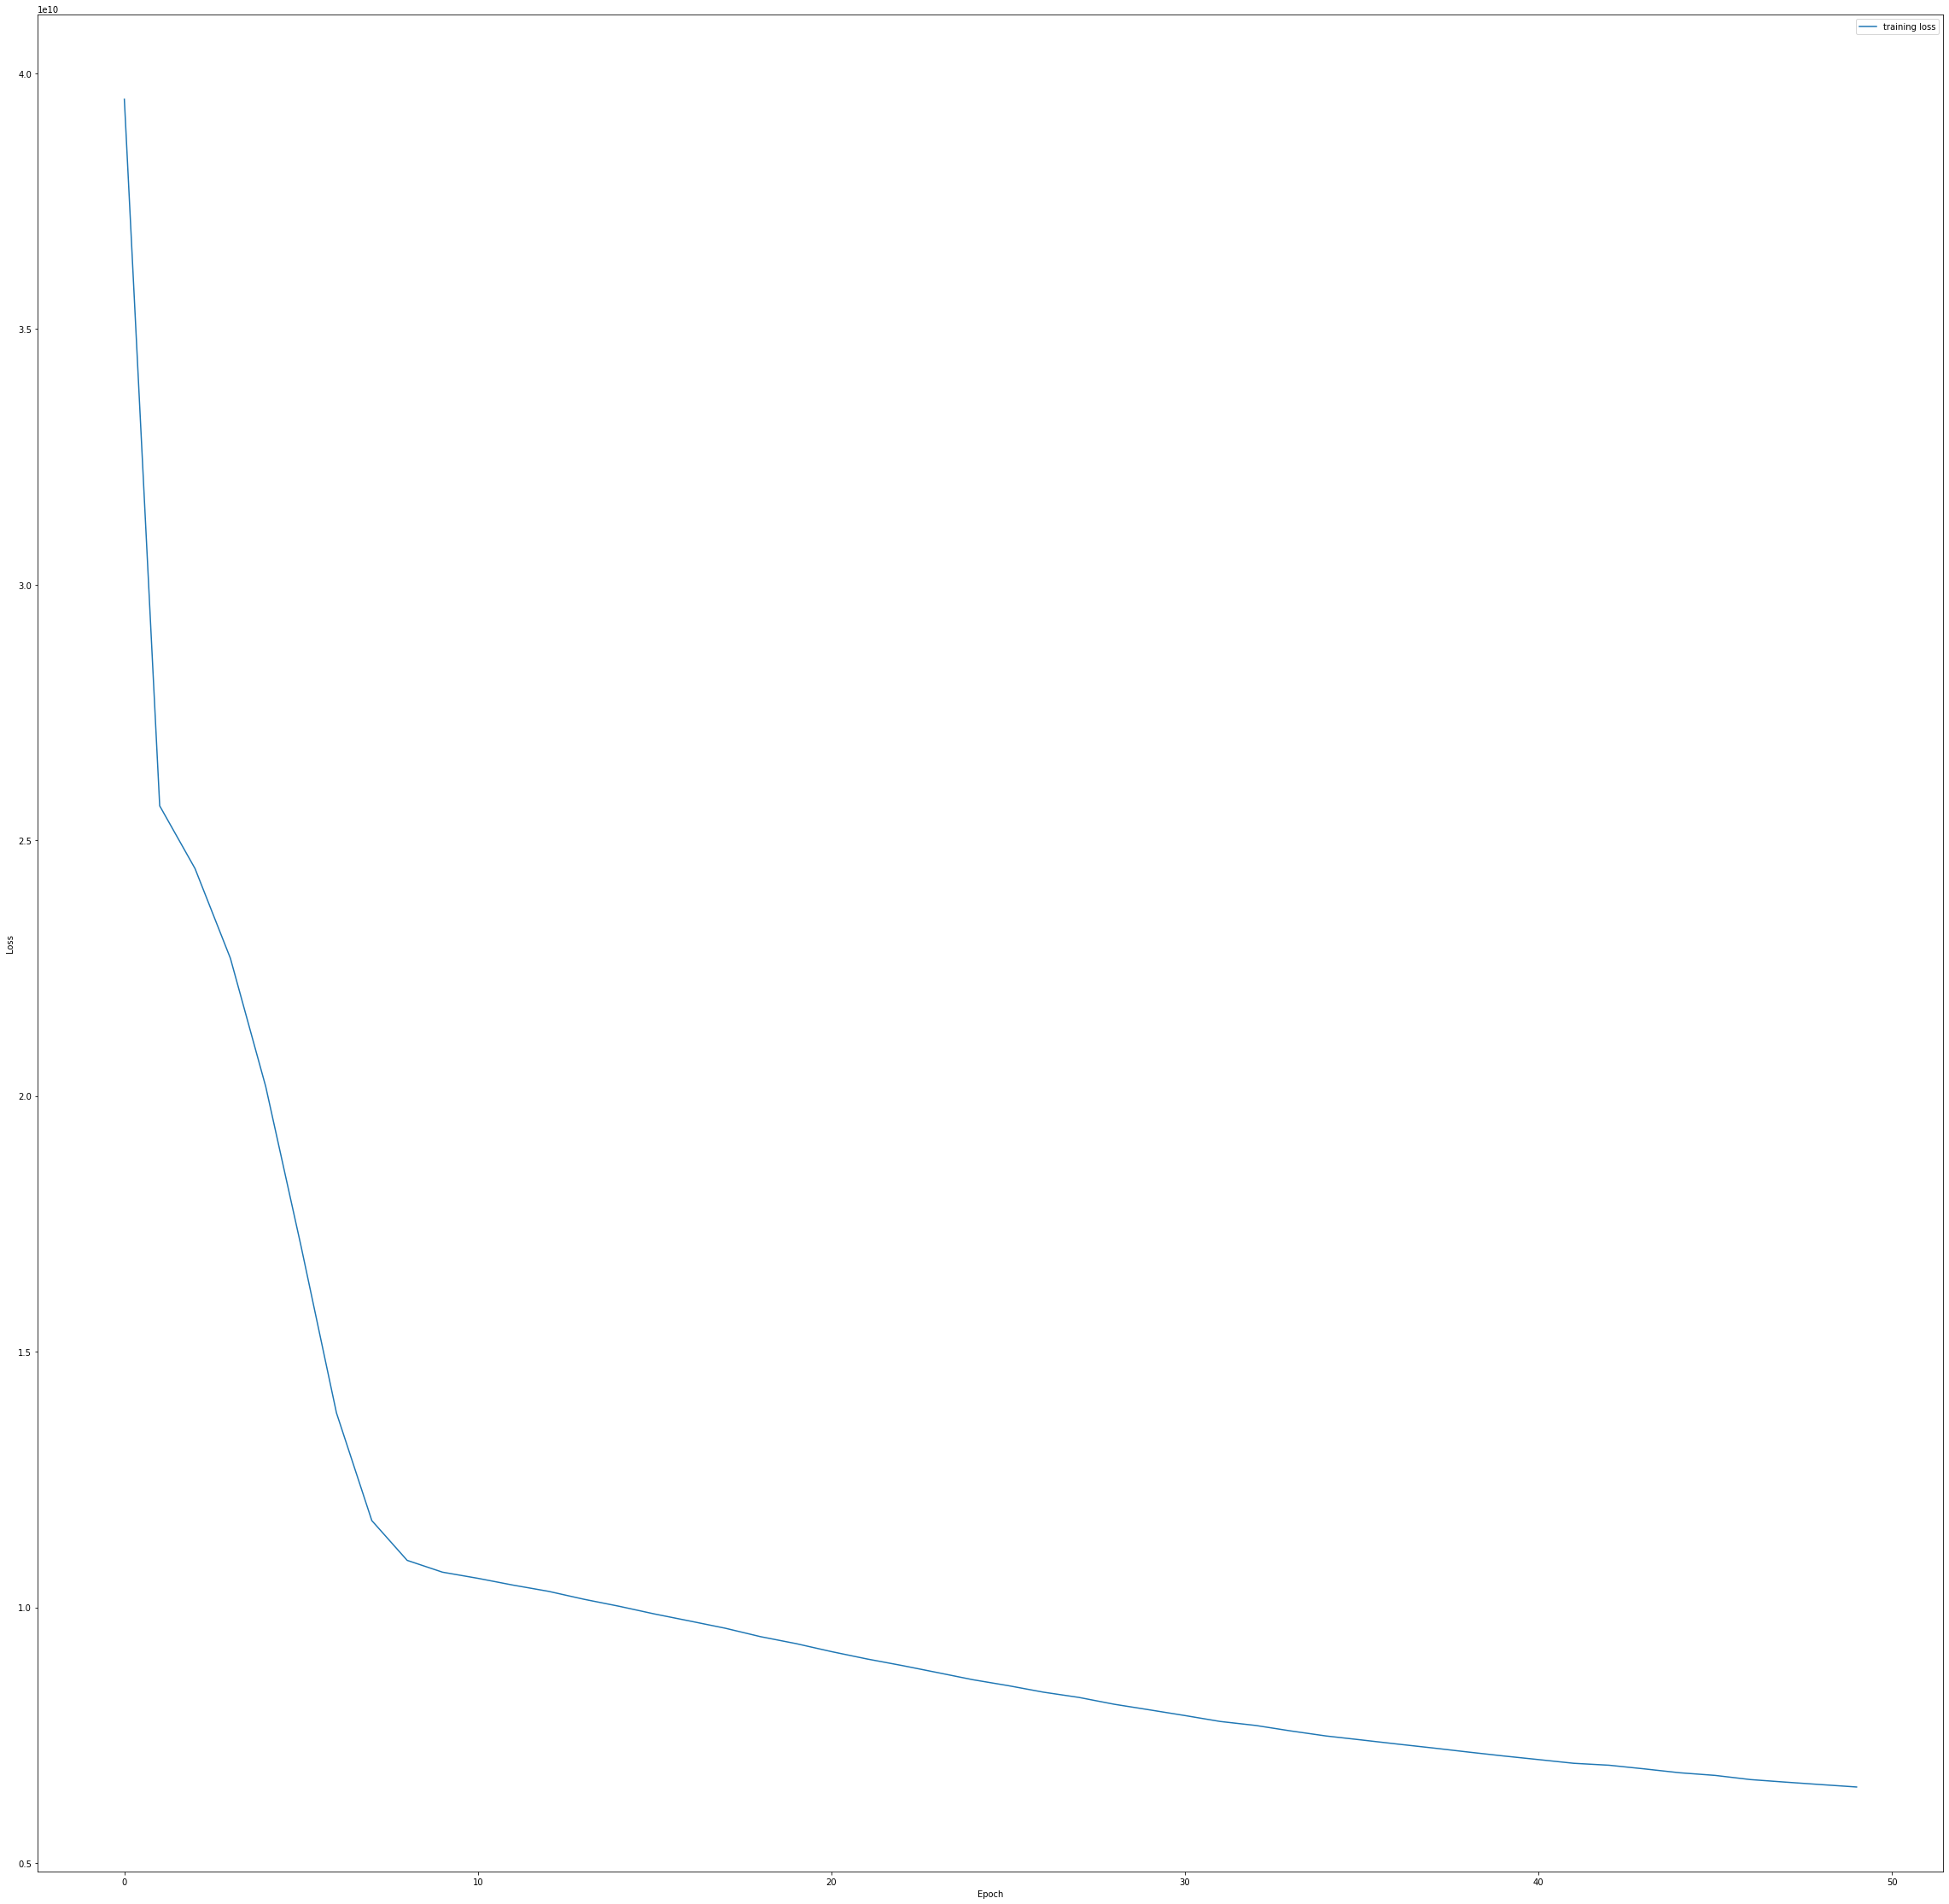

128/128 [==============================] - 0s 672us/step - loss: 7141493248.0000
Test loss: 7141493248.0
128/128 [==============================] - 0s 610us/step
Average difference between predicted and actual housing prices: $111,723.61


In [97]:
# Your work for experiments

# Got code for learning rate from here: https://keras.io/api/optimizers/
# changed model by using a learning rate of 0.001

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
#using mean_squared_error is commonly used loss function. Calculates mean squared difference between loss and actual values
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fit the model on training data
#mini-batch size if 64
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test data
loss_test = model.evaluate(X_test, Y_test)
print('Test loss:', loss_test)

# predict on test data
y_predication = model.predict(X_test)

# mean absolute error
mean = np.mean(np.abs(y_predication - Y_test))


print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mean))

Next we tried experimenting with changing the learning rates using different numbers. First used a learning rate of 0.1 and then used a learning rate of 0.01 produced a average difference that were similar but then we used a learning rate of 0.01 which produced the best average difference of them all. Here using different learning rates still doesn't decrease us from our starting point average differnce from section 2.2).

Epoch 1/50
256/256 [==============================] - 1s 1ms/step - loss: 53777154048.0000 - val_loss: 65478344704.0000
Epoch 2/50
256/256 [==============================] - 0s 1ms/step - loss: 37958307840.0000 - val_loss: 29687250944.0000
Epoch 3/50
256/256 [==============================] - 0s 1ms/step - loss: 25545027584.0000 - val_loss: 28321939456.0000
Epoch 4/50
256/256 [==============================] - 0s 1ms/step - loss: 24725432320.0000 - val_loss: 27278329856.0000
Epoch 5/50
256/256 [==============================] - 0s 1ms/step - loss: 23819520000.0000 - val_loss: 26589200384.0000
Epoch 6/50
256/256 [==============================] - 0s 1ms/step - loss: 22736601088.0000 - val_loss: 24819511296.0000
Epoch 7/50
256/256 [==============================] - 0s 1ms/step - loss: 21287217152.0000 - val_loss: 23144325120.0000
Epoch 8/50
256/256 [==============================] - 0s 1ms/step - loss: 19146563584.0000 - val_loss: 20572209152.0000
Epoch 9/50
256/256 [====================

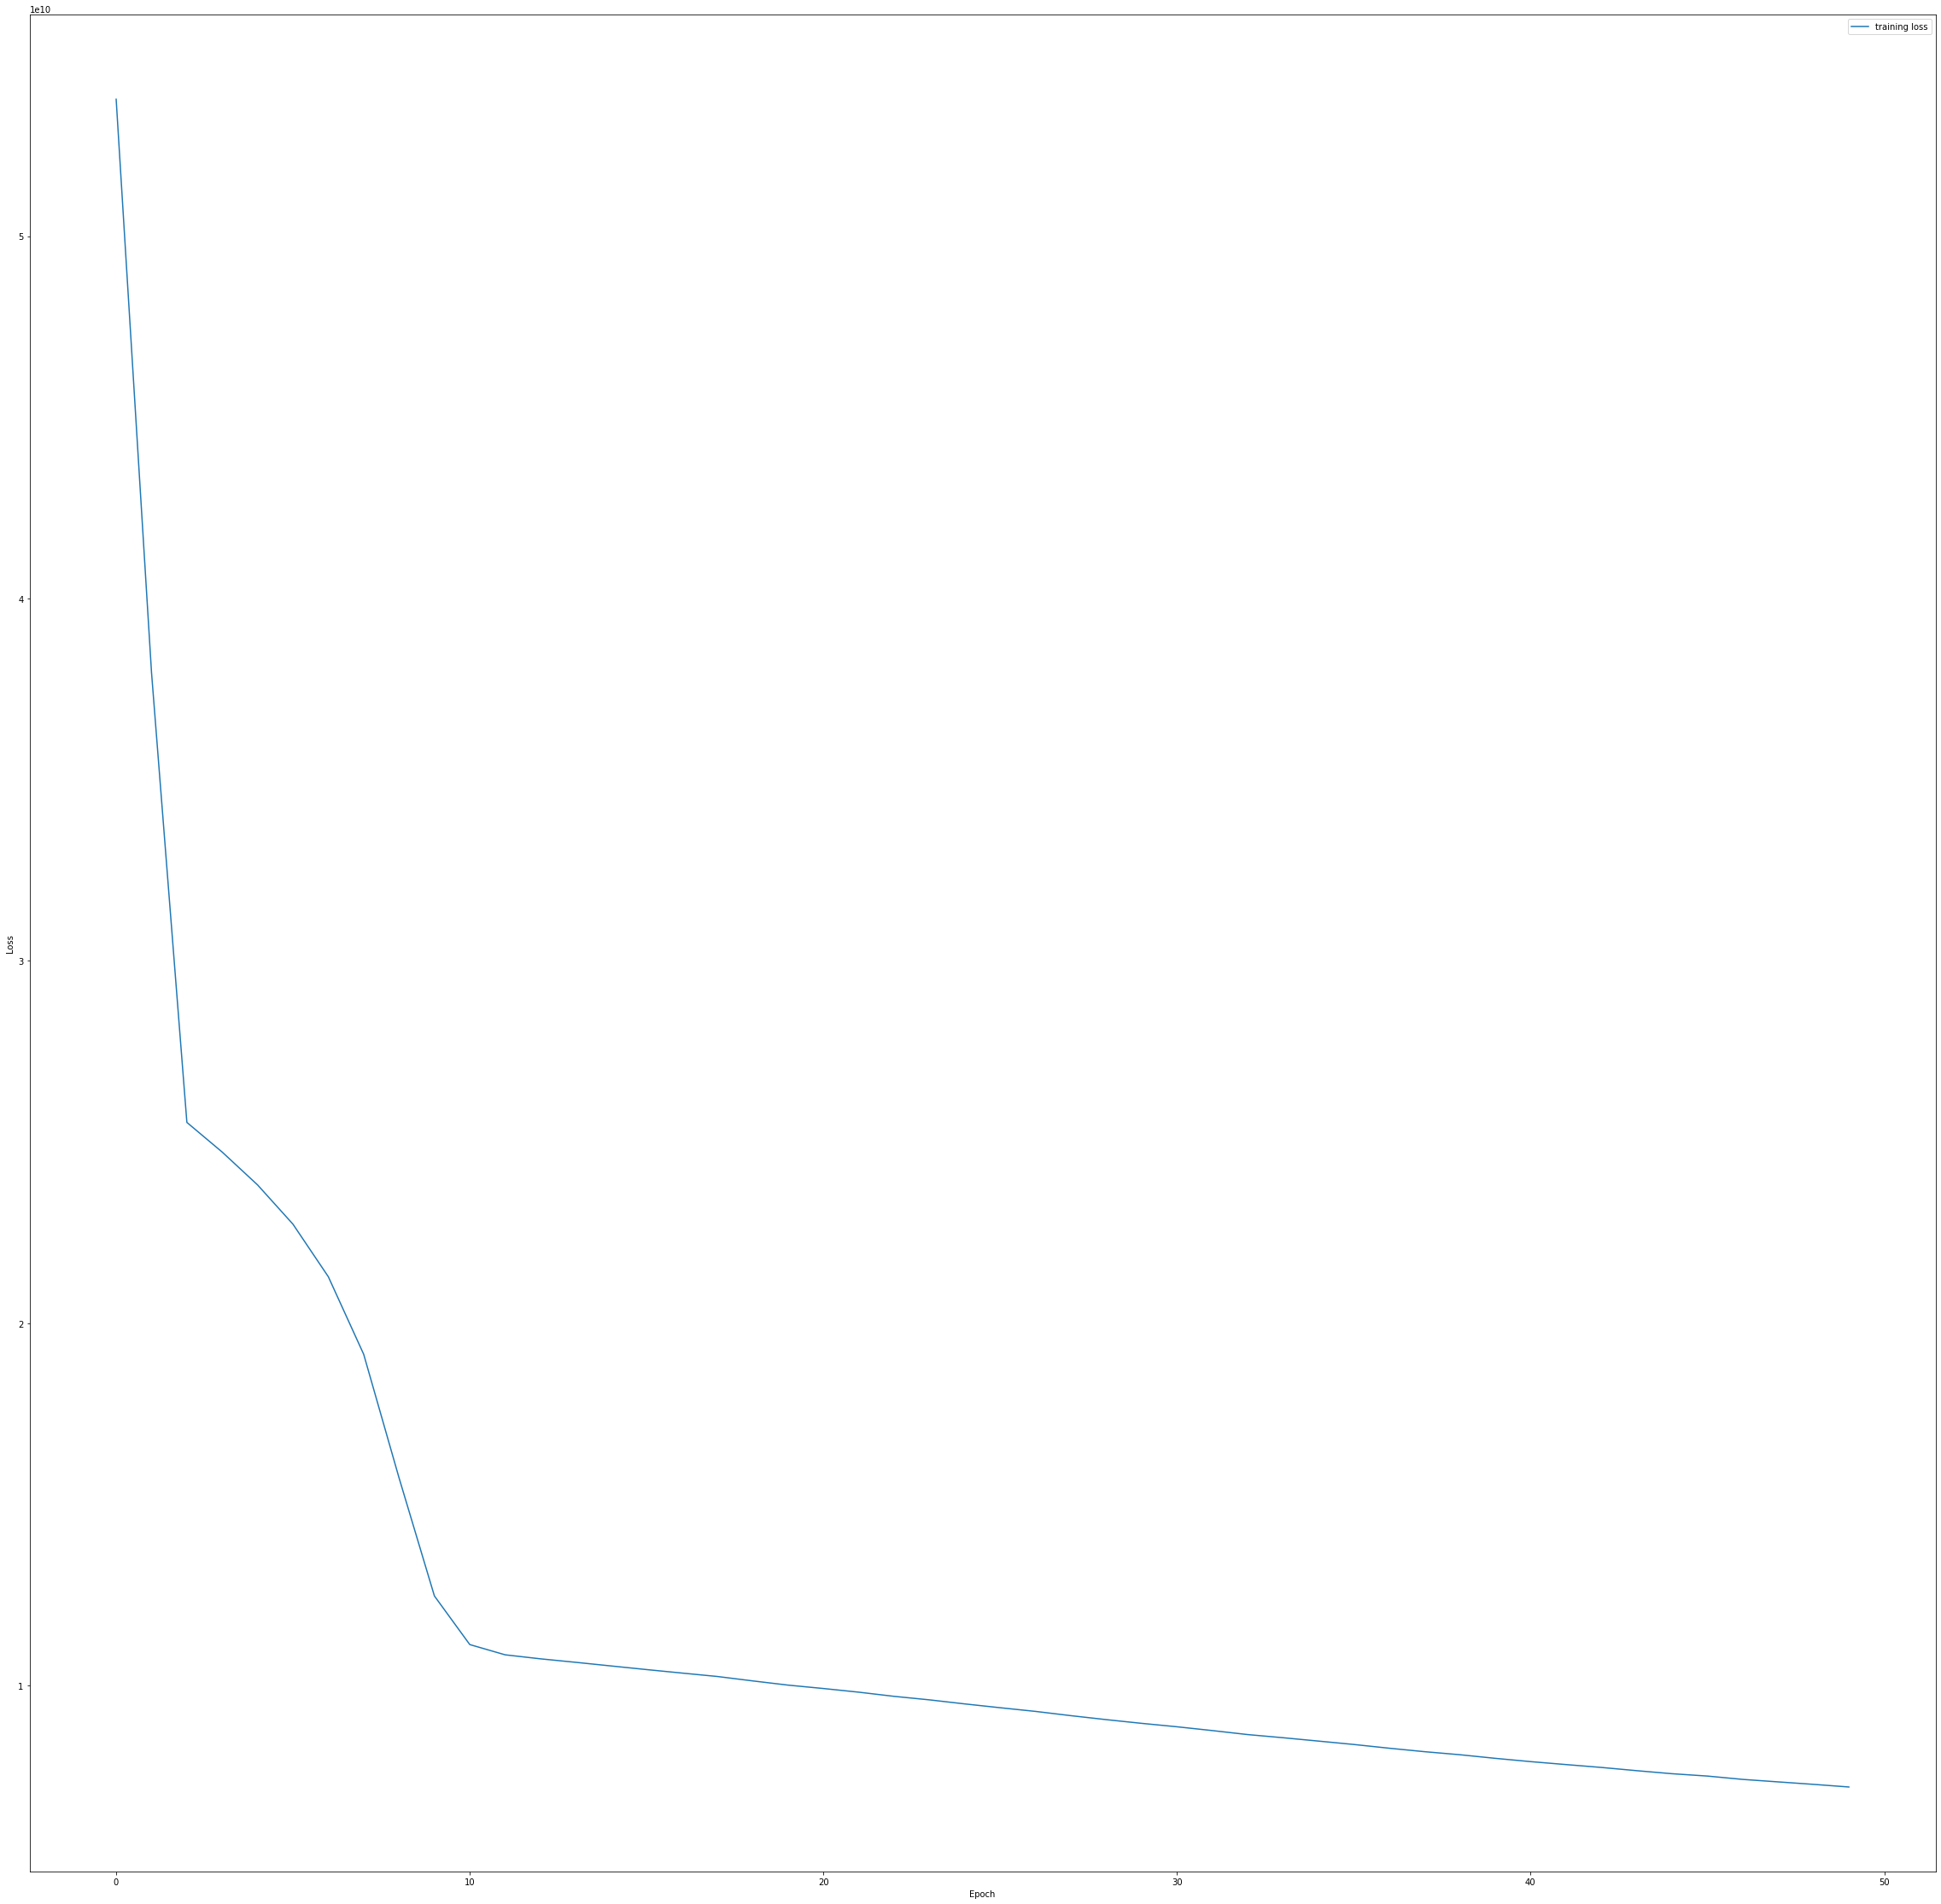

128/128 [==============================] - 0s 771us/step - loss: 8005360640.0000
Test loss: 8005360640.0
128/128 [==============================] - 0s 604us/step
Average difference between predicted and actual housing prices: $109,494.40


In [98]:
# Your work for experiments

# Changed model for l2 regularization
# L2 Regularization code: https://keras.io/api/layers/regularizers/

from tensorflow.keras.regularizers import l2

# Define the L2 regularization strength
l2_strength = 0.9

# Define the model with L2 regularization
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(l2_strength)),
    Dense(32, activation='relu', kernel_regularizer=l2(l2_strength)),
    Dense(1, activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on training data
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
#plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test data
loss_test = model.evaluate(X_test, Y_test)
print('Test loss:', loss_test)

# predict on test data
y_predication = model.predict(X_test)

# mean absolute error
mean = np.mean(np.abs(y_predication - Y_test))


print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mean))

To combat high variance we next decided to try L2 regularization to normalize the input more as we can't add more training data. Using L2 regularization with an L2 regularization strength of 0.9 we found the average difference between predicted and actual housing price to start to decrease. We are making progress now!

Epoch 1/50
256/256 [==============================] - 1s 1ms/step - loss: 40140570624.0000 - val_loss: 29160456192.0000
Epoch 2/50
256/256 [==============================] - 0s 1ms/step - loss: 26328188928.0000 - val_loss: 28622487552.0000
Epoch 3/50
256/256 [==============================] - 0s 1ms/step - loss: 25121259520.0000 - val_loss: 27012089856.0000
Epoch 4/50
256/256 [==============================] - 0s 1ms/step - loss: 23401148416.0000 - val_loss: 24307892224.0000
Epoch 5/50
256/256 [==============================] - 0s 1ms/step - loss: 20707553280.0000 - val_loss: 21309755392.0000
Epoch 6/50
256/256 [==============================] - 0s 1ms/step - loss: 17349509120.0000 - val_loss: 17770985472.0000
Epoch 7/50
256/256 [==============================] - 0s 1ms/step - loss: 14099133440.0000 - val_loss: 14940808192.0000
Epoch 8/50
256/256 [==============================] - 0s 1ms/step - loss: 12504844288.0000 - val_loss: 13648090112.0000
Epoch 9/50
256/256 [====================

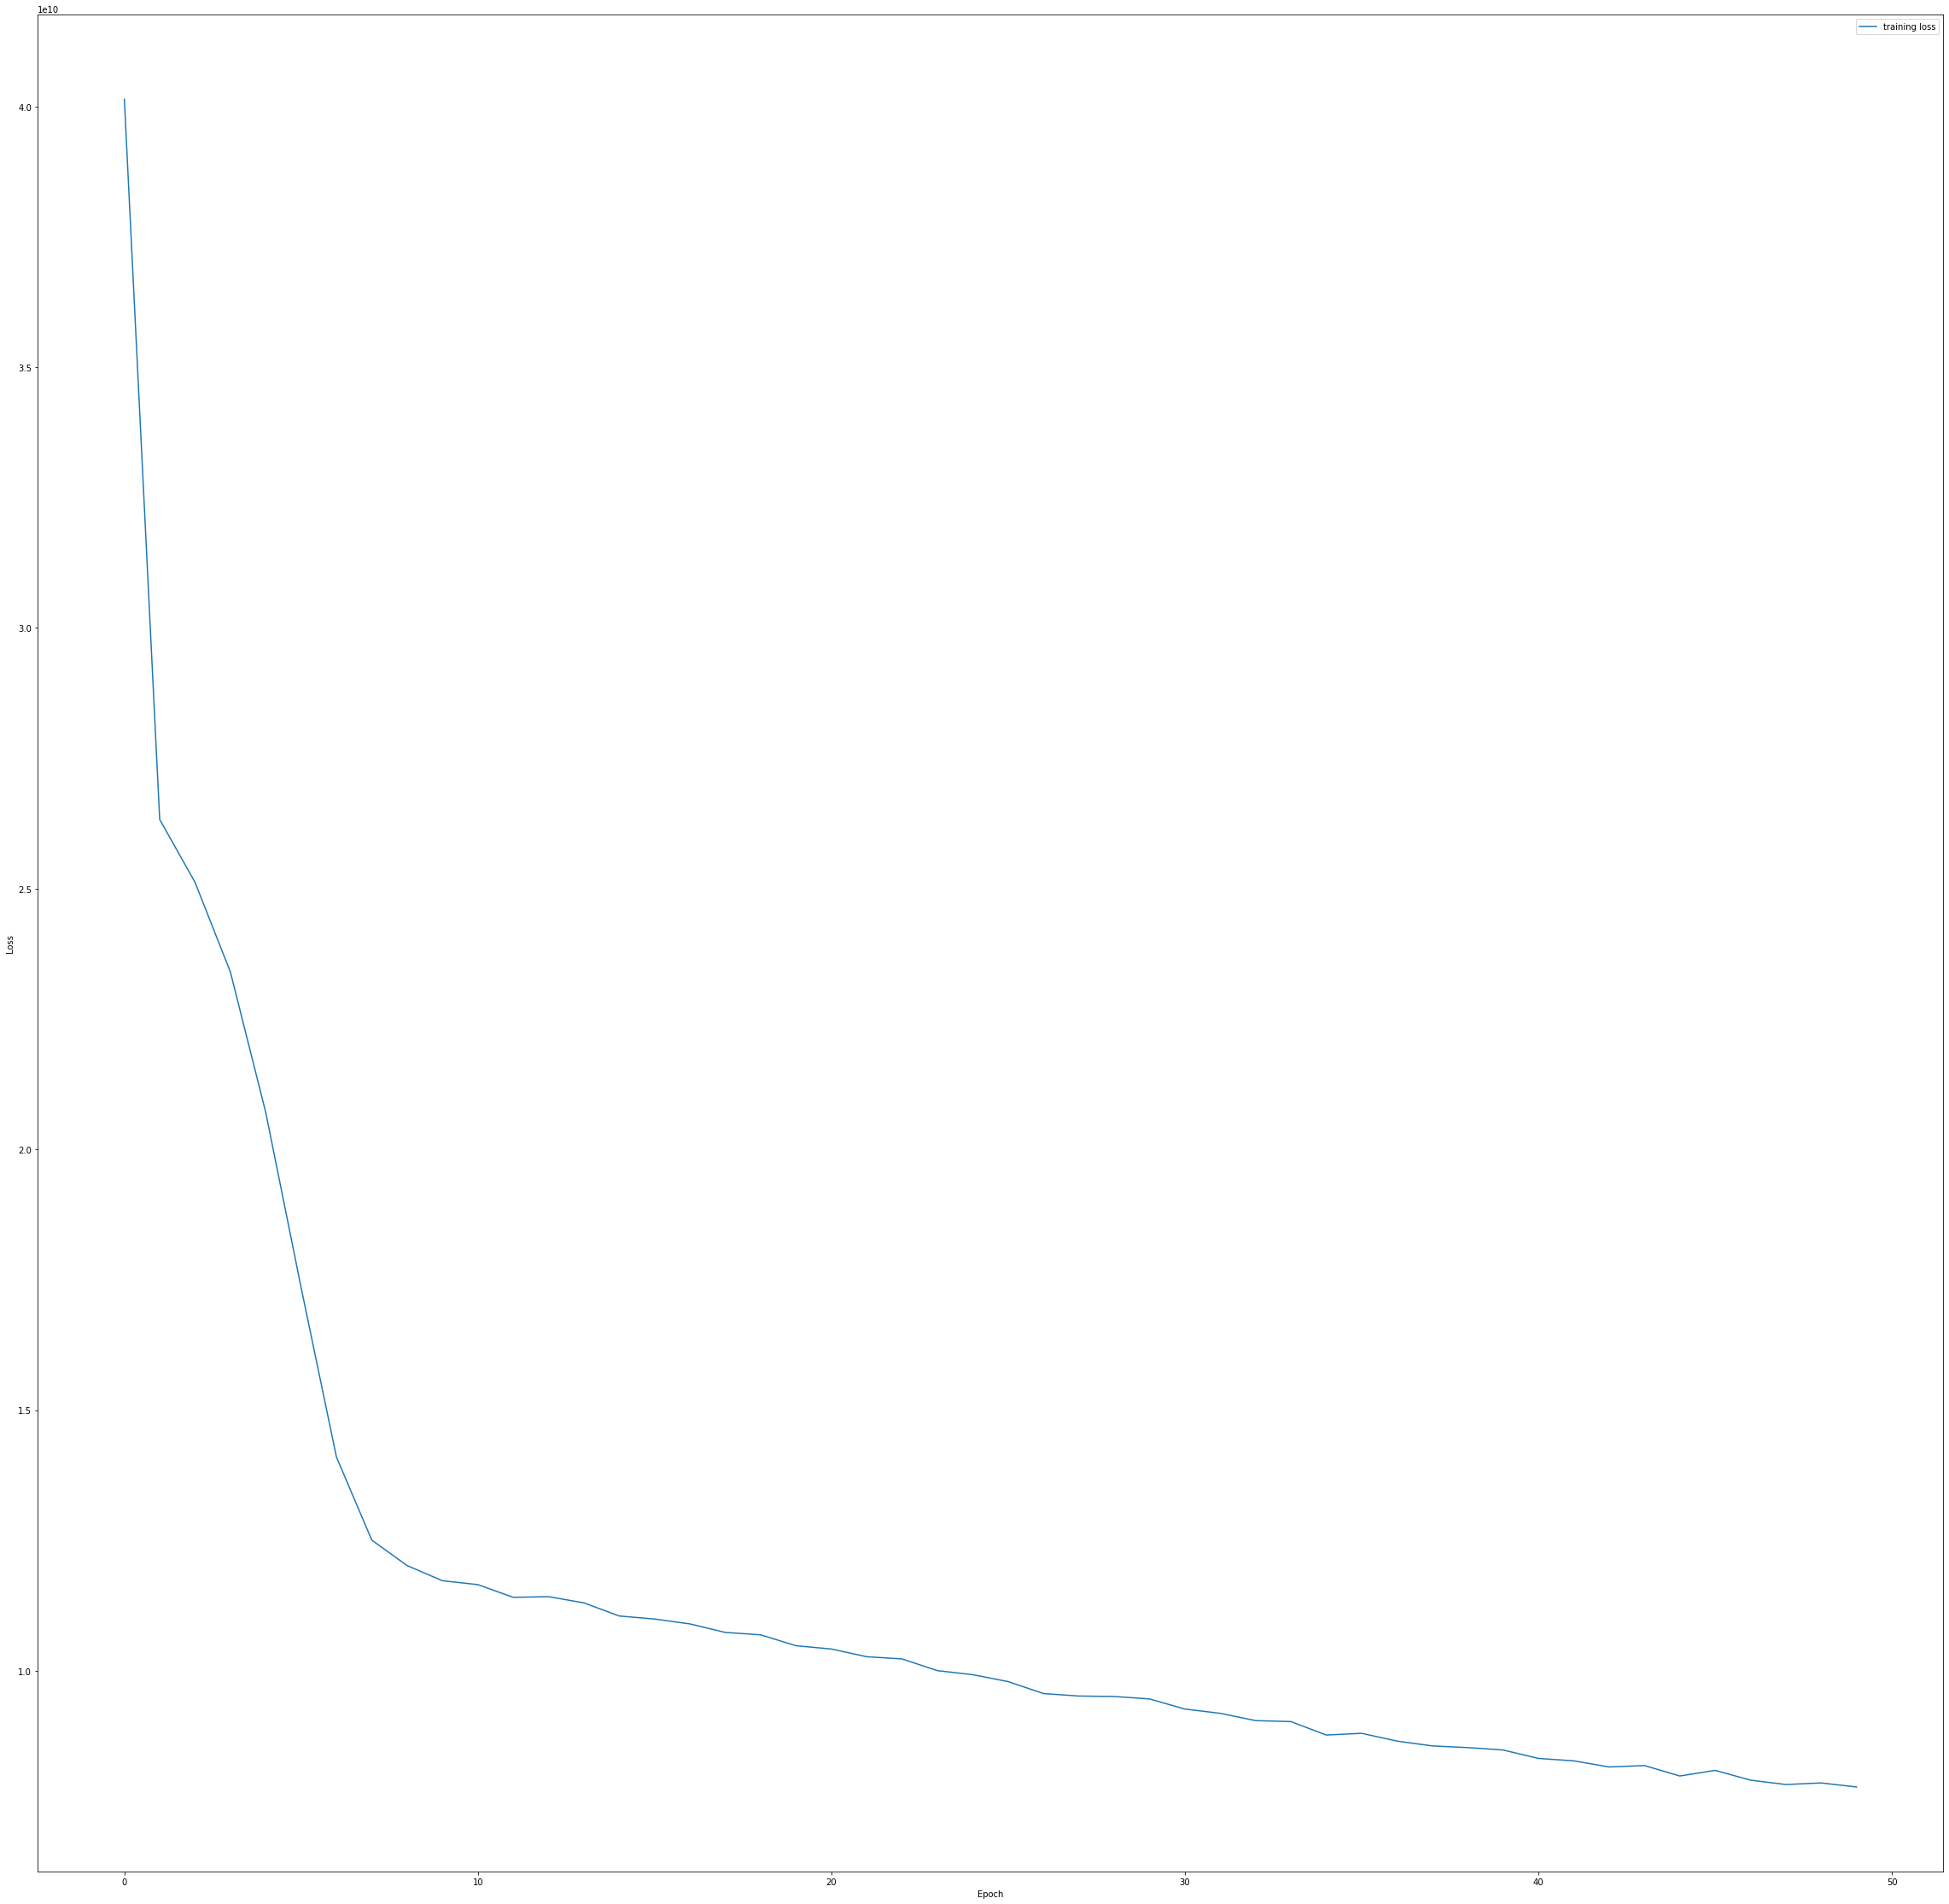

128/128 [==============================] - 0s 728us/step - loss: 7629121536.0000
Test loss: 7629121536.0
128/128 [==============================] - 0s 664us/step
Average difference between predicted and actual housing prices: $110,183.92


In [99]:
from tensorflow.keras.layers import Dropout

# Code used for dropout regularization: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# Define the dropout rate
dropout_rate = 0.2

# Define the model with dropout layers
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(dropout_rate),
    Dense(32, activation='relu'),
    Dropout(dropout_rate),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on training data
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))

# Plot the loss, evaluate the model, and calculate MAE as before
plt.plot(history.history['loss'], label='training loss')
#plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test data
loss_test = model.evaluate(X_test, Y_test)
print('Test loss:', loss_test)

# predict on test data
y_predication = model.predict(X_test)

# mean absolute error
mean = np.mean(np.abs(y_predication - Y_test))


print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mean))

Keeping at the regularization idea, we next decided to use dropout regularization. We used a dropout rate of 0.2 and our average difference between predicted and actual is finally less then the starting point of Section 2.2. 

Epoch 1/50
511/511 [==============================] - 1s 1ms/step - loss: 36138983424.0000 - val_loss: 28555247616.0000
Epoch 2/50
511/511 [==============================] - 0s 958us/step - loss: 25521928192.0000 - val_loss: 27587633152.0000
Epoch 3/50
511/511 [==============================] - 1s 998us/step - loss: 24069328896.0000 - val_loss: 25890351104.0000
Epoch 4/50
511/511 [==============================] - 1s 981us/step - loss: 21908062208.0000 - val_loss: 22689351680.0000
Epoch 5/50
511/511 [==============================] - 0s 932us/step - loss: 18565648384.0000 - val_loss: 19243554816.0000
Epoch 6/50
511/511 [==============================] - 0s 934us/step - loss: 14398132224.0000 - val_loss: 14642653184.0000
Epoch 7/50
511/511 [==============================] - 1s 1ms/step - loss: 11276764160.0000 - val_loss: 12457110528.0000
Epoch 8/50
511/511 [==============================] - 1s 1ms/step - loss: 10648679424.0000 - val_loss: 12523682816.0000
Epoch 9/50
511/511 [==========

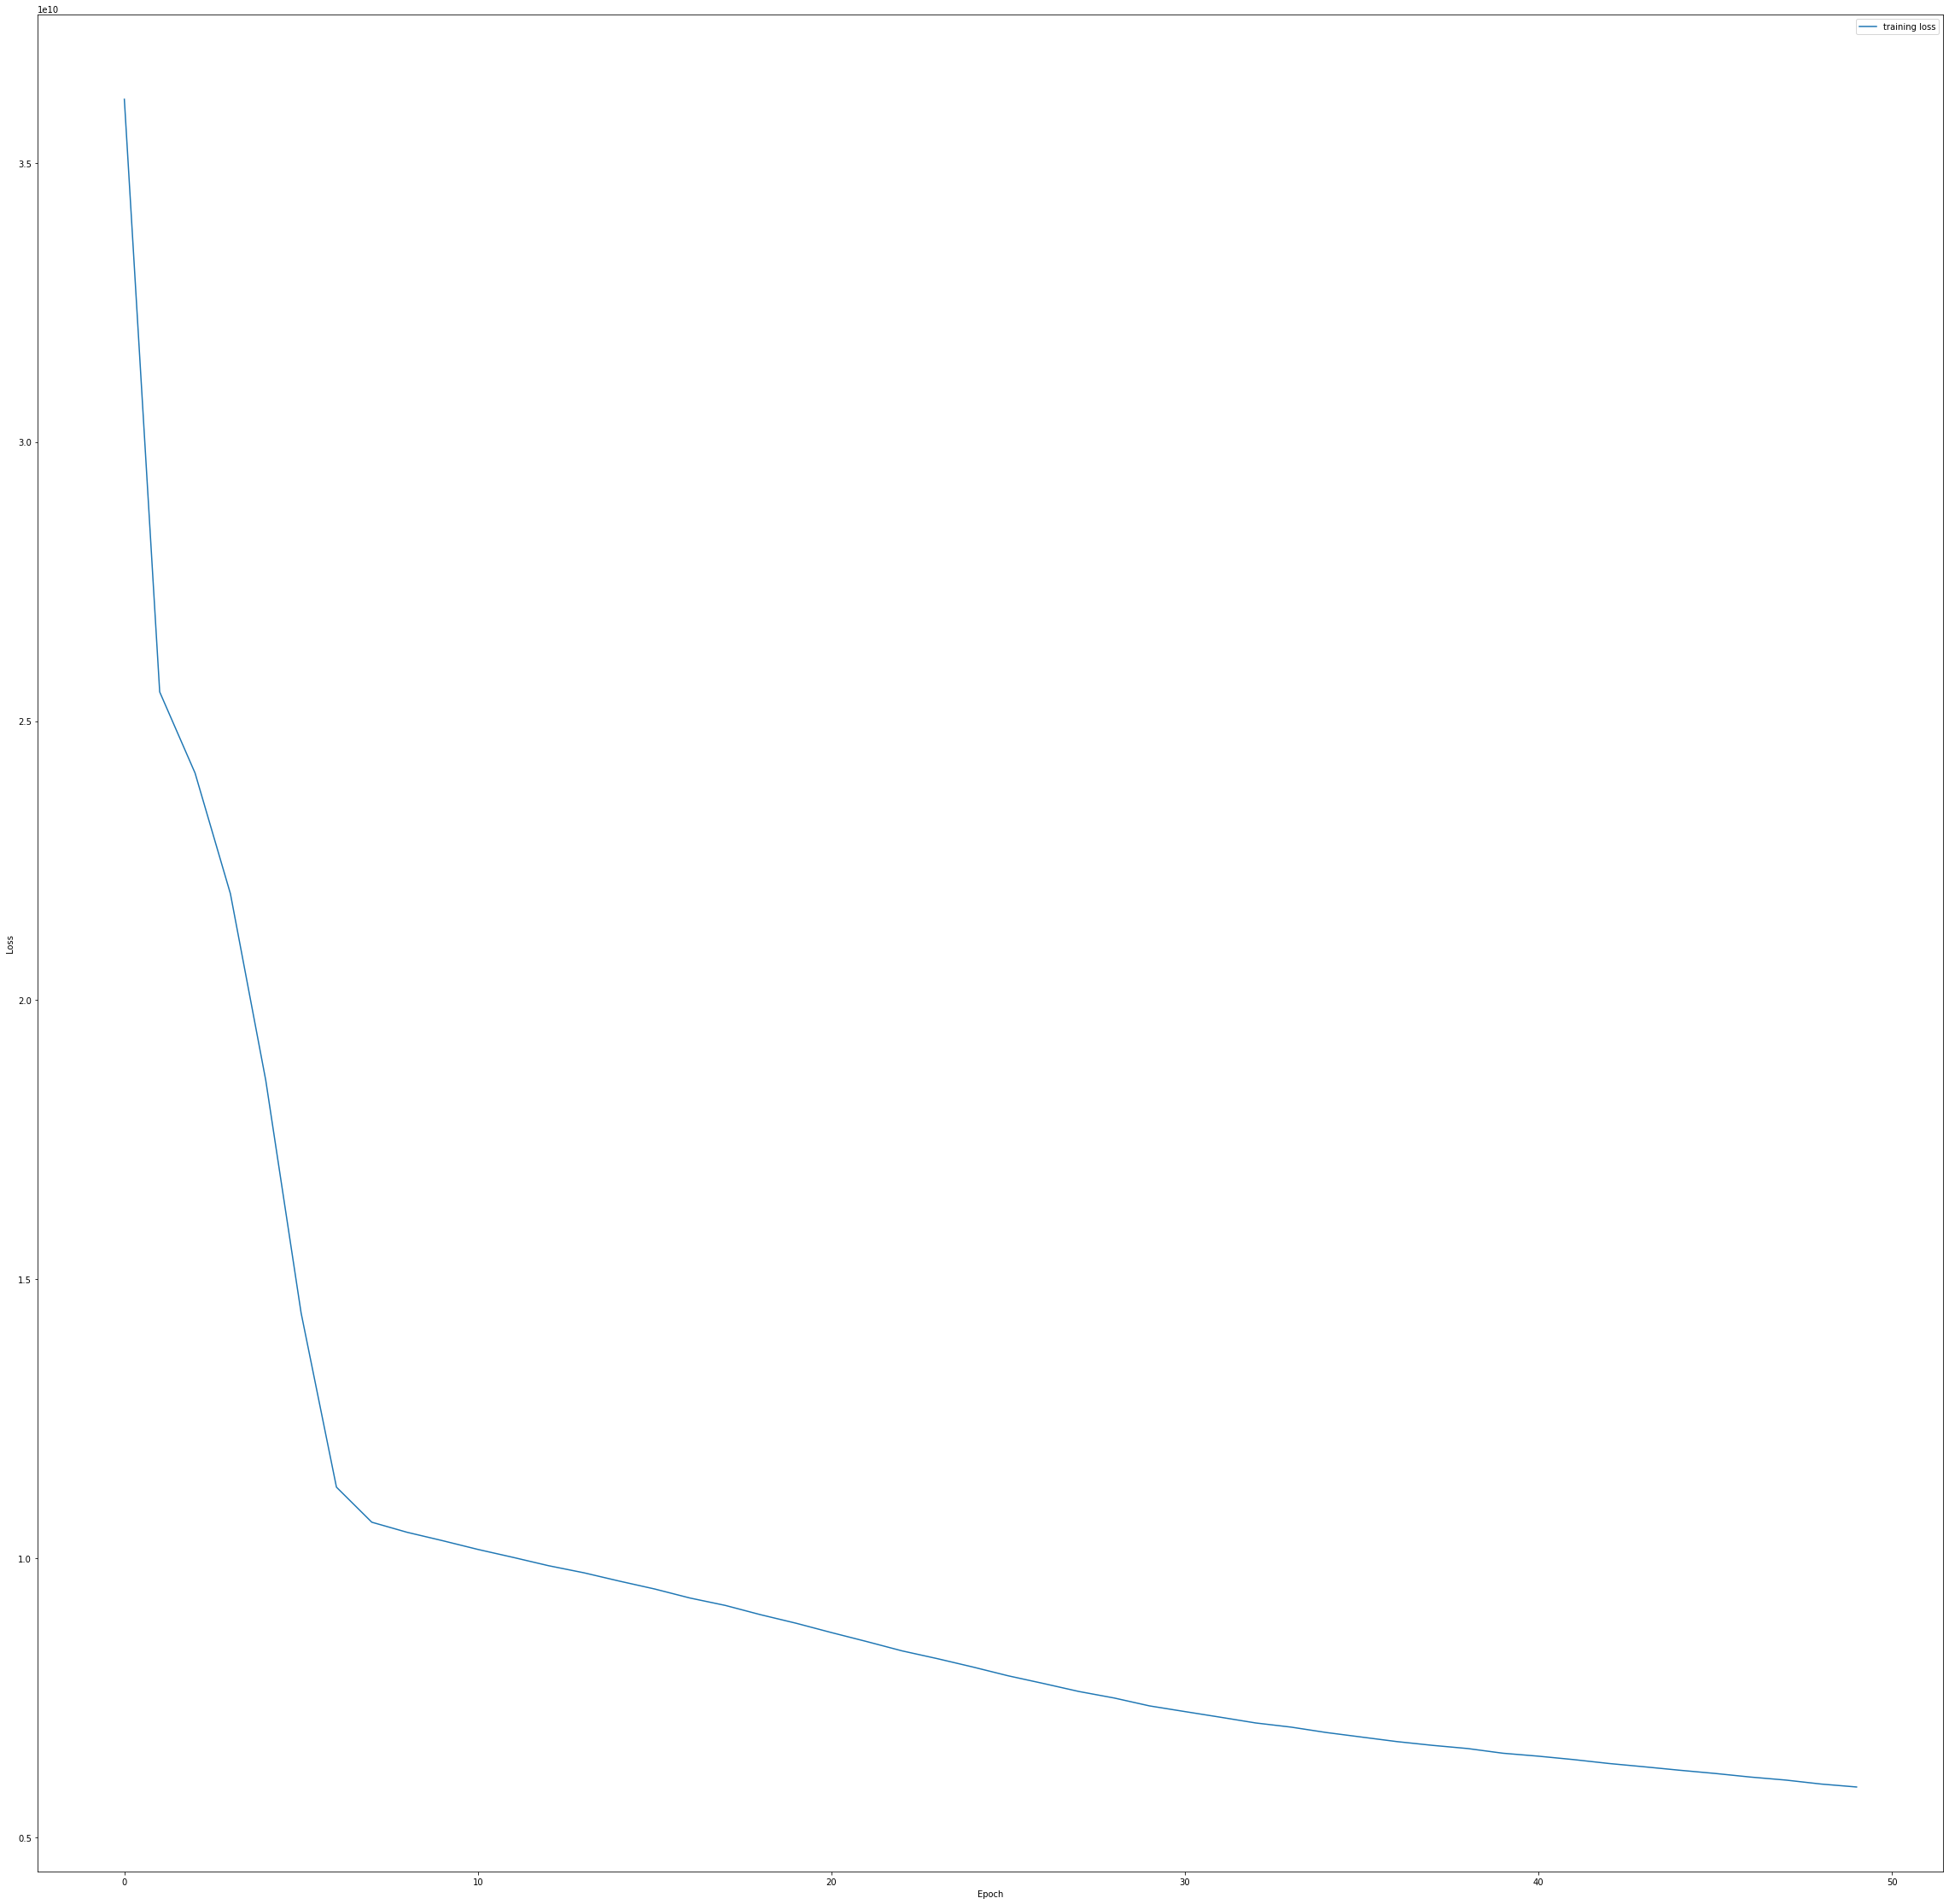

128/128 [==============================] - 0s 704us/step - loss: 6253538816.0000
Test loss: 6253538816.0
128/128 [==============================] - 0s 612us/step
Average difference between predicted and actual housing prices: $115,213.44


In [100]:
from tensorflow.keras.optimizers import RMSprop

# Code for RMSProp: https://keras.io/api/optimizers/rmsprop/
# Define the model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model with the RMSprop optimizer
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

# Fit the model on training data
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
#plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test data
loss_test = model.evaluate(X_test, Y_test)
print('Test loss:', loss_test)

# predict on test data
y_predication = model.predict(X_test)

# mean absolute error
mean = np.mean(np.abs(y_predication - Y_test))


print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mean))

Next we tried doing something different which is using RMSProp as our Gradient descent optimization algorithm. Using this algorithm wasn't a good choice as our average differnce grew meaning our predications for the housing market aren't as good. We are going to stick with using adam as our optimization algorithm.

Epoch 1/100
16/16 [==============================] - 1s 9ms/step - loss: 53330907136.0000 - val_loss: 64689197056.0000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 52812517376.0000 - val_loss: 64099684352.0000
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 52184723456.0000 - val_loss: 63268118528.0000
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 51269857280.0000 - val_loss: 62038843392.0000
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 49917407232.0000 - val_loss: 60203040768.0000
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 47973683200.0000 - val_loss: 57681780736.0000
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 45411917824.0000 - val_loss: 54359695360.0000
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 42138882048.0000 - val_loss: 50235539456.0000
Epoch 9/100
16/16 [=============================

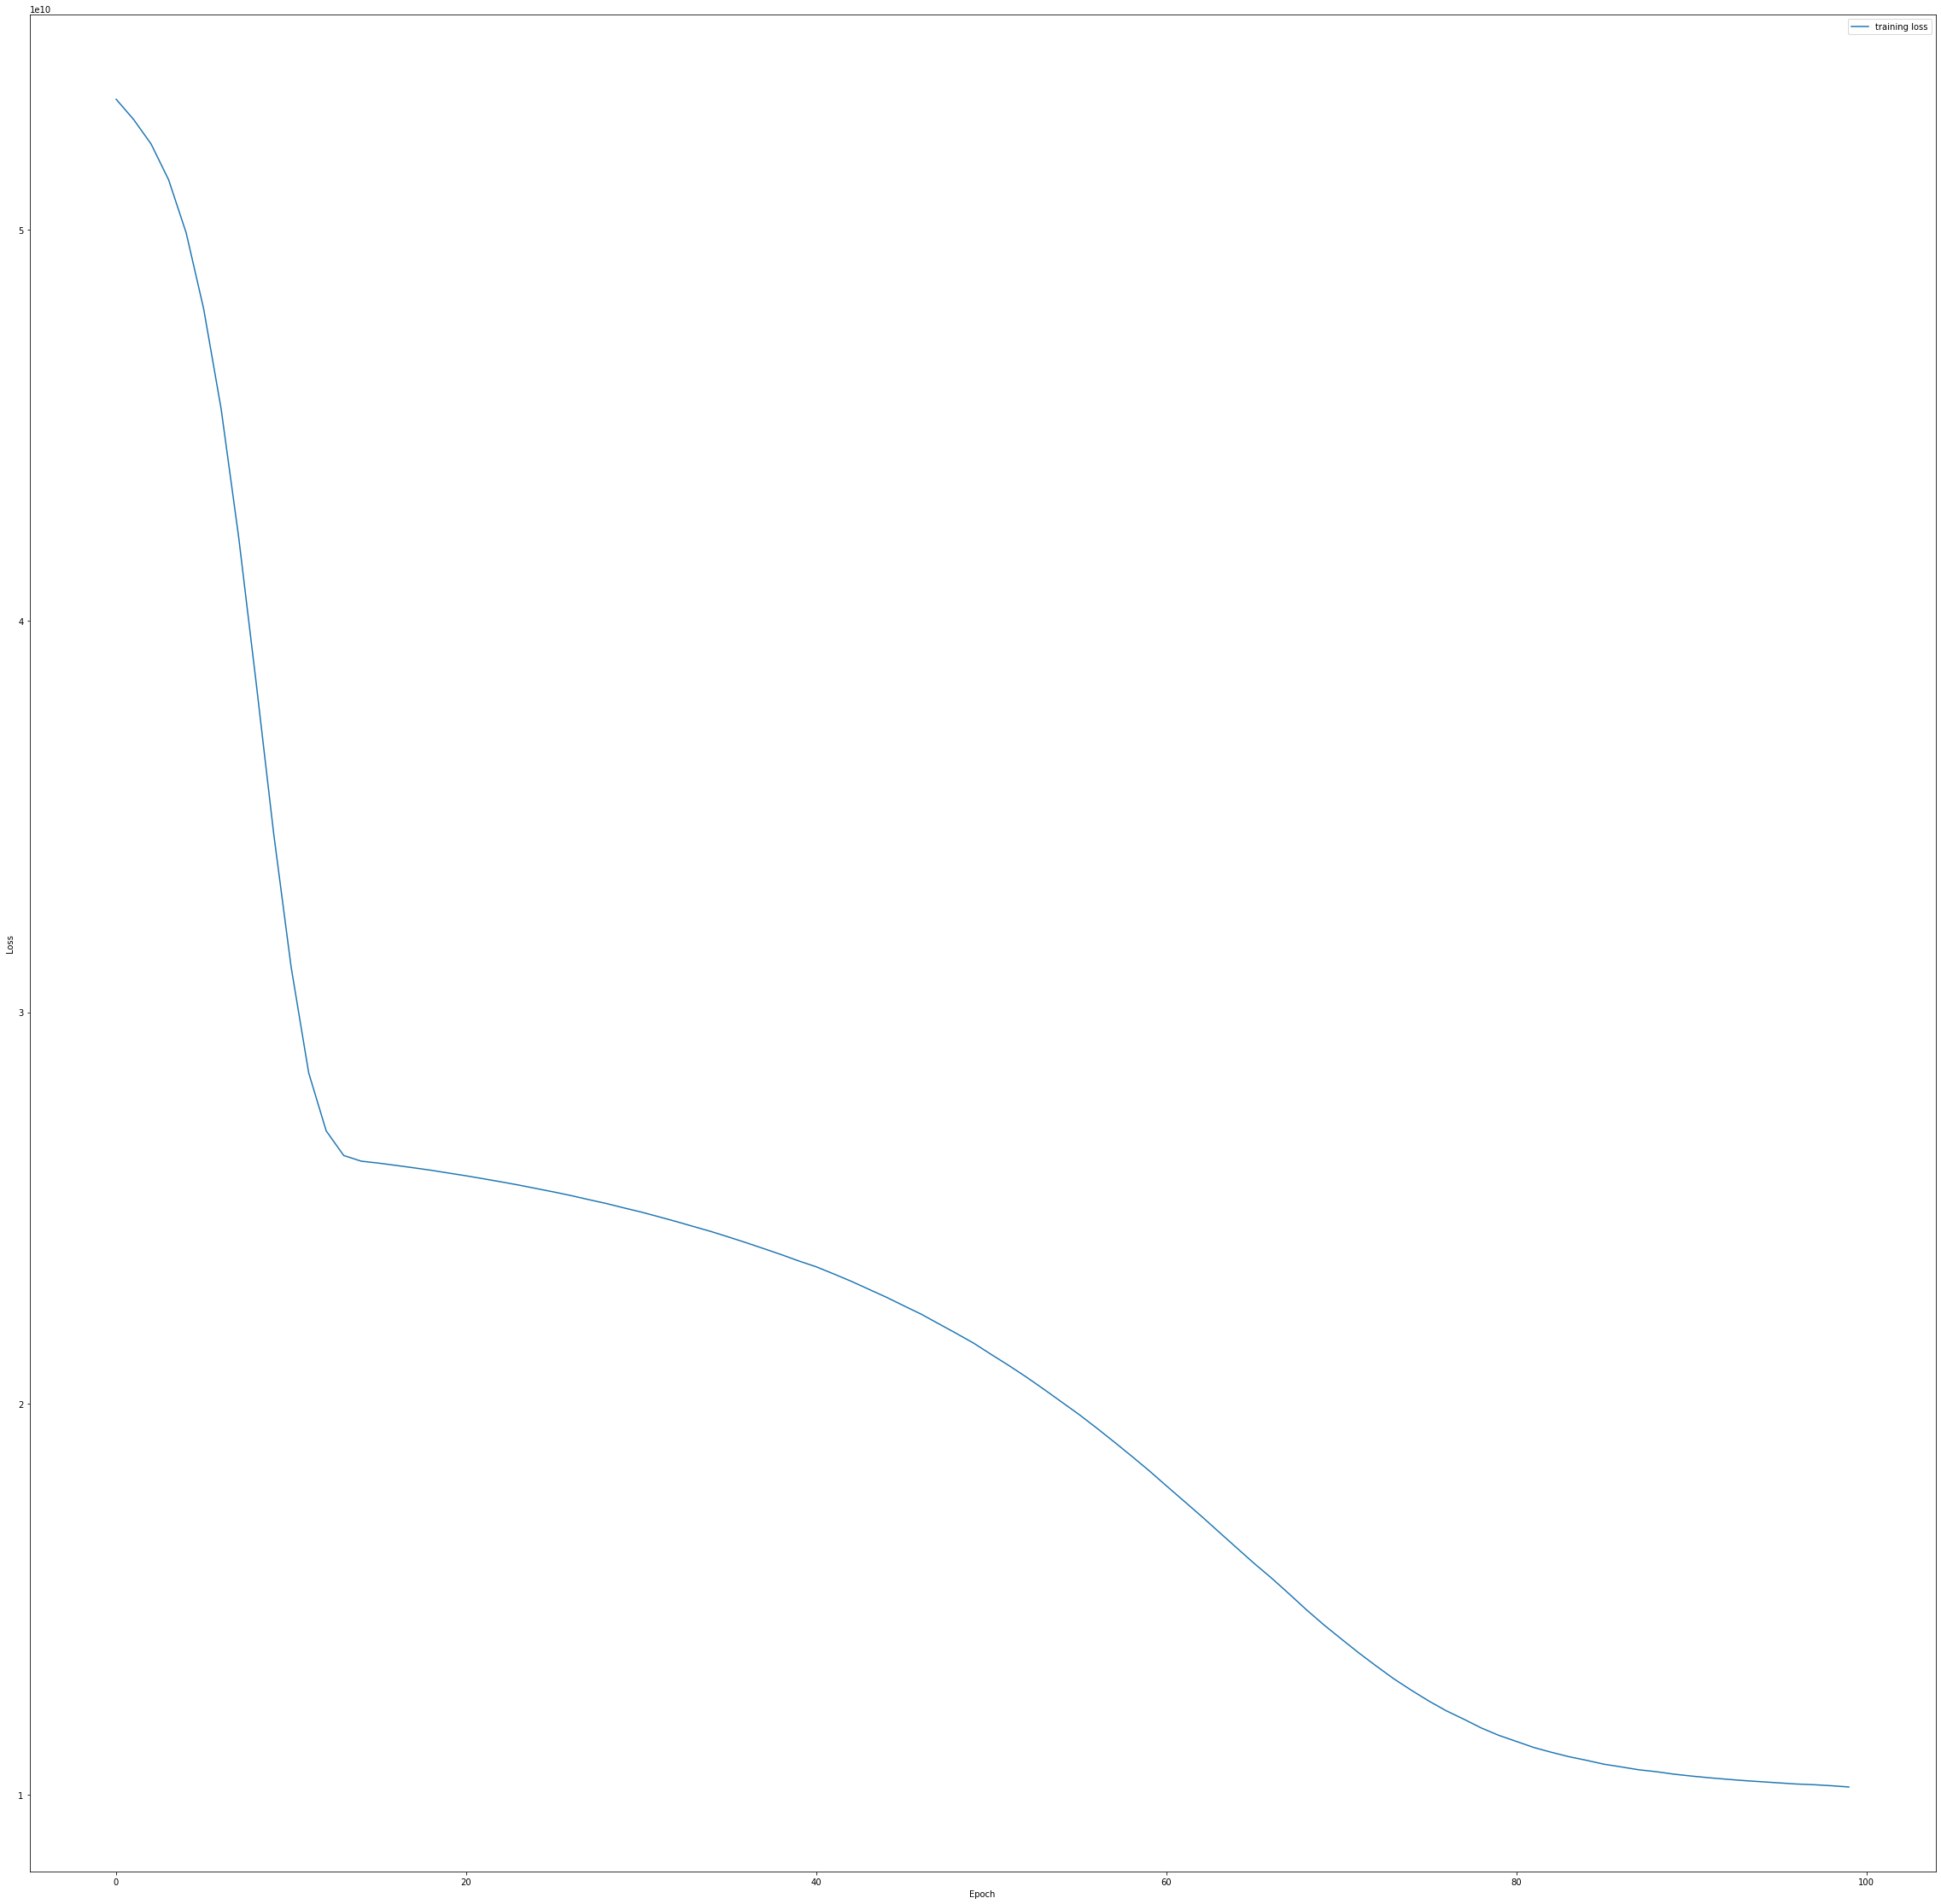

128/128 [==============================] - 0s 761us/step - loss: 12192912384.0000
Test loss: 12192912384.0
128/128 [==============================] - 0s 604us/step
Average difference between predicted and actual housing prices: $100,477.17


In [101]:
# Your work for experiments



# Changed model of batch size to 1024 and epochs to 100

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
#using mean_squared_error is commonly used loss function. Calculates mean squared difference between loss and actual values
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on training data
#mini-batch size if 64
history = model.fit(X_train, Y_train, epochs=100, batch_size=1024, validation_data=(X_test, Y_test))

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
#plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test data
loss_test = model.evaluate(X_test, Y_test)
print('Test loss:', loss_test)

# predict on test data
y_predication = model.predict(X_test)

# mean absolute error
mean = np.mean(np.abs(y_predication - Y_test))


print('Average difference between predicted and actual housing prices: ${:,.2f}'.format(mean))

Here is our final model which we can achieve the best results of. We did something different here where we didn't change the learning rate, or optimization method and just changed the number of epochs to 100 from 50 and the number of mini batches to 1024 from 32. We then tried using different numbers of mini batches and epochs but they didn't give us as good as results as using 100 as the epoch and 1024 as the mini batch size.

**Grading**: 
- Part 1 code for L_layer_model(): **10 marks**
- Part 2:
  - Dataset choice and analysis: **10 marks**
  - Building your model:
    - Basic model: **5 marks**
    - Implementing improvements to model: **15 marks**
  - Idea, Code, Experiment Cycle: **20 marks**

**Total** for project: **60 marks**

**Submission**: Submit a zip file containing all of the files/folders for your project. Make sure all files are included; do not assume we have certain files already.